In [ ]:
산업데이터사이언스학부 201904222 이동현 

In [5]:
주제: '우리나라 내부에 있어서 미세먼지 영향력'

첫 주제는 코로나 시대 전후 미세먼지 증감 여부로 해당 주제는 연도별로 비교하면 끝일 단순한 주제이며, 
옆나라인 중국에서 미세먼지 대부분이 우리에게로 넘어온다는 점은 대한민국 국민이라면 전부 알만한 사실이기에 
분석할만한 주제가 없을 것이라고 판단하였습니다.
또한 주제가 없을만큼 그에 따른 데이터 분석에대한 결론을 짓기 힘들다고 생각했기 때문입니다.
즉, 어째서 증가하고 감소하였는지 등 합당한 이유가 없을것이라 생각했기 때문입니다.

In [1]:
import pandas as pd
import numpy as np

In [ ]:
우선 KOSIS국가 통계포털에서 2019~2022년도의 초미세먼지(PM2.5) / 미세먼지(10) 자료를 찾아 연도별 증감상황을 분석해보았습니다.

In [734]:
air102022 = pd.read_csv('미세먼지_PM10__월별_도시별_대기오염도_2022.csv', encoding = 'euc-kr')
air102021 = pd.read_csv('미세먼지_PM10__월별_도시별_대기오염도_2021.csv', encoding = 'euc-kr')
air102020 = pd.read_csv('미세먼지_PM10__월별_도시별_대기오염도_2020.csv', encoding = 'euc-kr')
air102019 = pd.read_csv('미세먼지_PM10__월별_도시별_대기오염도_2019.csv', encoding = 'euc-kr')
air252022 = pd.read_csv('미세먼지_PM2.5__월별_도시별_대기오염도_2022.csv', encoding = 'euc-kr')
air252021 = pd.read_csv('미세먼지_PM2.5__월별_도시별_대기오염도_2021.csv', encoding = 'euc-kr')
air252020 = pd.read_csv('미세먼지_PM2.5__월별_도시별_대기오염도_2020.csv', encoding = 'euc-kr')
air252019 = pd.read_csv('미세먼지_PM2.5__월별_도시별_대기오염도_2019.csv', encoding = 'euc-kr')

In [97]:
#데이터세트 수가 많은 관계로 4개씩 묶어서 상태를 확인
air102022.head(), air102021.head(), air102020.head(), air102019.head()

(   구분(1)  구분(2) 2022.01 2022.02 2022.03 2022.04 2022.05 2022.06 2022.07  \
 0  서울특별시  서울특별시      43      40      41      45      33      22      25   
 1  부산광역시  부산광역시      31      30      38      32      31      19      20   
 2  대구광역시  대구광역시      37      35      42      36      33      22      20   
 3  인천광역시  인천광역시      42      38      42      44      32      21      26   
 4  광주광역시  광주광역시      32      34      38      34      29      20      18   
 
   2022.08 2022.09 2022.10 2022.11  
 0      20      22      25      39  
 1      19      20      21      33  
 2      18      20      24      41  
 3      21      26      30      41  
 4      16      21      25      34  ,
    구분(1)  구분(2) 2021.01 2021.02 2021.03 2021.04 2021.05 2021.06 2021.07  \
 0  서울특별시  서울특별시      38      48      67      42      61      33      24   
 1  부산광역시  부산광역시      36      37      60      37      36      26      18   
 2  대구광역시  대구광역시      40      41      59      42      41      35      19   
 3  인천광역시  인천광역

In [10]:
air102022.info(), air102021.info(), air102020.info(), air102019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분(1)    171 non-null    object
 1   구분(2)    171 non-null    object
 2   2022.01  171 non-null    object
 3   2022.02  171 non-null    object
 4   2022.03  171 non-null    object
 5   2022.04  171 non-null    object
 6   2022.05  171 non-null    object
 7   2022.06  171 non-null    object
 8   2022.07  171 non-null    object
 9   2022.08  171 non-null    object
 10  2022.09  171 non-null    object
 11  2022.10  171 non-null    object
 12  2022.11  171 non-null    object
dtypes: object(13)
memory usage: 17.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분(1)    171 non-null    object
 1   구분(2)    171 non-null    object
 2   2021.01  171 non-null    object
 3   202

(None, None, None, None)

In [98]:
air102022.describe(), air102021.describe(), air102020.describe(), air102019.describe()

(       구분(1) 구분(2) 2022.01 2022.02 2022.03 2022.04 2022.05 2022.06 2022.07  \
 count    171   171     171     171     171     171     171     171     171   
 unique    17   162      33      27      35      35      26      19      24   
 top      경기도   도평균      43      40      42      32      29      21      20   
 freq      32     9      11      14      14      17      23      30      26   
 
        2022.08 2022.09 2022.10 2022.11  
 count      171     171     171     171  
 unique      20      27      31      34  
 top         17      20      21      36  
 freq        32      22      16       9  ,
        구분(1) 구분(2) 2021.01 2021.02 2021.03 2021.04 2021.05 2021.06 2021.07  \
 count    171   171     171     171     171     171     171     171     171   
 unique    17   162      28      36      47      31      41      31      29   
 top      경기도   도평균      34      43      54      39      50      29      19   
 freq      32     9      15      11      10      14       9      14      20 

In [ ]:
#상태 확인결과 데이터 세트 설명 자체에 있던 유효측정 비율이 일정 미만인 값 표기인 '*' 이외에도 '-'로 공백값이 있음을 확인했습니다.

In [13]:
air252022.head(), air252021.head(), air252020.head(), air252019.head()

(   구분(1)  구분(2) 2022.01 2022.02 2022.03 2022.04 2022.05 2022.06 2022.07  \
 0  서울특별시  서울특별시      29      26      21      22      17      12      16   
 1  부산광역시  부산광역시      21      19      21      16      17      10      12   
 2  대구광역시  대구광역시      24      21      22      17      17      12      12   
 3  인천광역시  인천광역시      28      24      22      22      16      12      18   
 4  광주광역시  광주광역시      23      24      21      17      16      12      12   
 
   2022.08 2022.09 2022.10 2022.11  
 0      11      11      14      22  
 1      10      10      11      19  
 2       9       9      12      23  
 3      11      14      17      24  
 4       9      12      14      21  ,
    구분(1)  구분(2) 2021.01 2021.02 2021.03 2021.04 2021.05 2021.06 2021.07  \
 0  서울특별시  서울특별시      21      29      32      19      20      19      15   
 1  부산광역시  부산광역시      19      21      21      15      16      15       9   
 2  대구광역시  대구광역시      21      24      23      17      18      20      10   
 3  인천광역시  인천광역

In [14]:
air252022.info(), air252021.info(), air252020.info(), air252019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분(1)    171 non-null    object
 1   구분(2)    171 non-null    object
 2   2022.01  171 non-null    object
 3   2022.02  171 non-null    object
 4   2022.03  171 non-null    object
 5   2022.04  171 non-null    object
 6   2022.05  171 non-null    object
 7   2022.06  171 non-null    object
 8   2022.07  171 non-null    object
 9   2022.08  171 non-null    object
 10  2022.09  171 non-null    object
 11  2022.10  171 non-null    object
 12  2022.11  171 non-null    object
dtypes: object(13)
memory usage: 17.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분(1)    171 non-null    object
 1   구분(2)    171 non-null    object
 2   2021.01  171 non-null    object
 3   202

(None, None, None, None)

In [15]:
air252022.describe(), air252021.describe(), air252020.describe(), air252019.describe()

(       구분(1) 구분(2) 2022.01 2022.02 2022.03 2022.04 2022.05 2022.06 2022.07  \
 count    171   171     171     171     171     171     171     171     171   
 unique    17   162      28      25      26      17      17      12      21   
 top      경기도   도평균      29      24      18      15      17      11      14   
 freq      32     9      14      20      19      21      39      34      27   
 
        2022.08 2022.09 2022.10 2022.11  
 count      171     171     171     171  
 unique      14      20      22      29  
 top          9      12      13      21  
 freq        32      28      19      17  ,
        구분(1) 구분(2) 2021.01 2021.02 2021.03 2021.04 2021.05 2021.06 2021.07  \
 count    171   171     171     171     171     171     171     171     171   
 unique    17   162      24      25      29      22      23      26      25   
 top      경기도   도평균      20      29      24      17      17      18      10   
 freq      32     9      20      14      13      23      20      23      31 

In [ ]:
#초미세먼지또한 미세먼지 데이터세트와 다를바없이 결측값이 확인되었습니다.

In [8]:
def namere(s):
    a = s.rename(columns={'구분(1)' : '도', '구분(2)' : '시'})
    return a

In [735]:
air102022 = namere(air102022)
air102021 = namere(air102021)
air102020 = namere(air102020)
air102019 = namere(air102019)
air252022 = namere(air252022)
air252021 = namere(air252021)
air252020 = namere(air252020)
air252019 = namere(air252019)
#컬럼명이 구분(1) 등으로 보기힘들게 되어있어 도 및 시로 구분이 용이하도록 변경하였습니다.

In [ ]:
np.finfo('float32')

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [725]:
def nonullhi (a) :
    leng = len(a.columns)
    x = 1
    for i in range(1,leng-1):
        x = x + 1
        a[a.columns[x]] = a[a.columns[x]].str.replace('*','', regex = True).replace('-','0', regex = True).astype('float32')
    return a
#def 함수로 특수문자 *제거및 결측치 - 를 0으로 치환하였습니다.

In [736]:
nonullhi(air102022)

,도,시,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11
0,서울특별시,서울특별시,43.0,40.0,41.0,45.0,33.0,22.0,25.0,20.0,22.0,25.0,39.0
1,부산광역시,부산광역시,31.0,30.0,38.0,32.0,31.0,19.0,20.0,19.0,20.0,21.0,33.0
2,대구광역시,대구광역시,37.0,35.0,42.0,36.0,33.0,22.0,20.0,18.0,20.0,24.0,41.0
3,인천광역시,인천광역시,42.0,38.0,42.0,44.0,32.0,21.0,26.0,21.0,26.0,30.0,41.0
4,광주광역시,광주광역시,32.0,34.0,38.0,34.0,29.0,20.0,18.0,16.0,21.0,25.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,경상남도,합천,26.0,25.0,30.0,29.0,30.0,23.0,24.0,22.0,20.0,20.0,29.0
167,경상남도,도평균,29.0,28.0,34.0,29.0,29.0,19.0,21.0,19.0,20.0,21.0,31.0
168,제주특별자치도,제주특별자치도,27.0,31.0,42.0,32.0,29.0,20.0,18.0,17.0,28.0,27.0,34.0
169,제주특별자치도,서귀포,23.0,27.0,39.0,30.0,28.0,22.0,23.0,19.0,28.0,24.0,27.0


In [737]:
nonullhi(air102021)

,도,시,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12
0,서울특별시,서울특별시,38.0,48.0,67.0,42.0,61.0,33.0,24.0,22.0,15.0,27.0,45.0,39.0
1,부산광역시,부산광역시,36.0,37.0,60.0,37.0,36.0,26.0,18.0,19.0,17.0,23.0,34.0,31.0
2,대구광역시,대구광역시,40.0,41.0,59.0,42.0,41.0,35.0,19.0,21.0,18.0,26.0,40.0,38.0
3,인천광역시,인천광역시,37.0,46.0,69.0,42.0,59.0,36.0,29.0,22.0,16.0,28.0,44.0,39.0
4,광주광역시,광주광역시,37.0,40.0,65.0,39.0,50.0,29.0,16.0,17.0,15.0,25.0,34.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,경상남도,합천,28.0,29.0,44.0,32.0,36.0,27.0,17.0,0.0,0.0,20.0,26.0,24.0
167,경상남도,도평균,33.0,33.0,53.0,34.0,36.0,27.0,20.0,20.0,17.0,23.0,31.0,28.0
168,제주특별자치도,제주특별자치도,34.0,36.0,76.0,37.0,44.0,27.0,17.0,16.0,19.0,24.0,38.0,30.0
169,제주특별자치도,서귀포,29.0,33.0,68.0,35.0,40.0,23.0,21.0,19.0,21.0,25.0,34.0,25.0


In [738]:
nonullhi(air102020)

,도,시,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12
0,서울특별시,서울특별시,42.0,41.0,45.0,44.0,35.0,36.0,21.0,23.0,19.0,33.0,42.0,42.0
1,부산광역시,부산광역시,32.0,34.0,33.0,36.0,32.0,27.0,18.0,31.0,24.0,30.0,31.0,33.0
2,대구광역시,대구광역시,37.0,38.0,38.0,39.0,38.0,35.0,22.0,25.0,25.0,33.0,40.0,38.0
3,인천광역시,인천광역시,42.0,37.0,41.0,39.0,31.0,32.0,21.0,24.0,20.0,34.0,39.0,39.0
4,광주광역시,광주광역시,36.0,32.0,35.0,38.0,31.0,31.0,15.0,22.0,21.0,31.0,32.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,경상남도,합천,25.0,26.0,27.0,29.0,29.0,29.0,17.0,27.0,20.0,22.0,25.0,24.0
167,경상남도,도평균,29.0,32.0,31.0,33.0,32.0,29.0,20.0,29.0,24.0,29.0,30.0,30.0
168,제주특별자치도,제주특별자치도,35.0,38.0,39.0,44.0,38.0,28.0,21.0,24.0,28.0,34.0,31.0,28.0
169,제주특별자치도,서귀포,29.0,32.0,33.0,40.0,35.0,27.0,19.0,32.0,25.0,29.0,27.0,22.0


In [739]:
nonullhi(air102019)

,도,시,2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,2019.10,2019.11,2019.12
0,서울특별시,서울특별시,66.0,57.0,69.0,41.0,52.0,29.0,26.0,25.0,21.0,31.0,40.0,42.0
1,부산광역시,부산광역시,48.0,48.0,51.0,40.0,47.0,32.0,26.0,30.0,24.0,27.0,35.0,35.0
2,대구광역시,대구광역시,57.0,54.0,54.0,40.0,46.0,32.0,26.0,26.0,23.0,27.0,41.0,42.0
3,인천광역시,인천광역시,62.0,55.0,67.0,43.0,51.0,29.0,31.0,30.0,28.0,35.0,41.0,40.0
4,광주광역시,광주광역시,53.0,57.0,63.0,43.0,50.0,40.0,29.0,31.0,27.0,35.0,43.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,경상남도,합천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,26.0
159,경상남도,도평균,49.0,51.0,51.0,40.0,47.0,36.0,29.0,32.0,27.0,30.0,37.0,33.0
160,제주특별자치도,제주특별자치도,39.0,46.0,56.0,43.0,47.0,34.0,27.0,30.0,28.0,34.0,44.0,33.0
161,제주특별자치도,서귀포,32.0,38.0,47.0,35.0,40.0,28.0,24.0,30.0,23.0,31.0,38.0,27.0


In [740]:
nonullhi(air252022)

,도,시,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11
0,서울특별시,서울특별시,29.0,26.0,21.0,22.0,17.0,12.0,16.0,11.0,11.0,14.0,22.0
1,부산광역시,부산광역시,21.0,19.0,21.0,16.0,17.0,10.0,12.0,10.0,10.0,11.0,19.0
2,대구광역시,대구광역시,24.0,21.0,22.0,17.0,17.0,12.0,12.0,9.0,9.0,12.0,23.0
3,인천광역시,인천광역시,28.0,24.0,22.0,22.0,16.0,12.0,18.0,11.0,14.0,17.0,24.0
4,광주광역시,광주광역시,23.0,24.0,21.0,17.0,16.0,12.0,12.0,9.0,12.0,14.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,경상남도,합천,19.0,17.0,16.0,18.0,19.0,16.0,17.0,13.0,12.0,13.0,21.0
167,경상남도,도평균,20.0,18.0,18.0,14.0,16.0,11.0,12.0,10.0,10.0,12.0,19.0
168,제주특별자치도,제주특별자치도,16.0,18.0,20.0,16.0,15.0,11.0,11.0,9.0,15.0,15.0,20.0
169,제주특별자치도,서귀포,15.0,17.0,19.0,15.0,14.0,10.0,10.0,7.0,13.0,10.0,14.0


In [741]:
nonullhi(air252021)

,도,시,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12
0,서울특별시,서울특별시,21.0,29.0,32.0,19.0,20.0,19.0,15.0,13.0,7.0,13.0,26.0,23.0
1,부산광역시,부산광역시,19.0,21.0,21.0,15.0,16.0,15.0,9.0,10.0,8.0,12.0,18.0,19.0
2,대구광역시,대구광역시,21.0,24.0,23.0,17.0,18.0,20.0,10.0,11.0,9.0,15.0,22.0,22.0
3,인천광역시,인천광역시,20.0,28.0,33.0,19.0,20.0,23.0,19.0,13.0,8.0,14.0,25.0,24.0
4,광주광역시,광주광역시,22.0,25.0,27.0,18.0,20.0,18.0,10.0,10.0,8.0,15.0,21.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,경상남도,합천,16.0,18.0,17.0,14.0,15.0,18.0,11.0,0.0,9.0,13.0,15.0,15.0
167,경상남도,도평균,17.0,19.0,19.0,15.0,15.0,16.0,12.0,11.0,9.0,13.0,18.0,17.0
168,제주특별자치도,제주특별자치도,14.0,18.0,24.0,14.0,16.0,14.0,8.0,8.0,9.0,12.0,18.0,16.0
169,제주특별자치도,서귀포,13.0,16.0,23.0,14.0,16.0,12.0,8.0,7.0,7.0,10.0,16.0,13.0


In [742]:
nonullhi(air252020)

,도,시,2020.01,2020.02,2020.03,2020.04,2020.05,2020.06,2020.07,2020.08,2020.09,2020.10,2020.11,2020.12
0,서울특별시,서울특별시,29.0,28.0,25.0,21.0,19.0,21.0,13.0,14.0,11.0,17.0,24.0,27.0
1,부산광역시,부산광역시,21.0,22.0,16.0,17.0,17.0,15.0,10.0,19.0,13.0,15.0,17.0,21.0
2,대구광역시,대구광역시,26.0,26.0,20.0,18.0,20.0,20.0,14.0,16.0,15.0,18.0,23.0,24.0
3,인천광역시,인천광역시,27.0,23.0,21.0,16.0,15.0,17.0,14.0,14.0,10.0,15.0,21.0,24.0
4,광주광역시,광주광역시,27.0,21.0,18.0,17.0,18.0,18.0,9.0,14.0,13.0,17.0,20.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,경상남도,합천,17.0,16.0,14.0,14.0,14.0,16.0,10.0,16.0,12.0,12.0,15.0,17.0
167,경상남도,도평균,19.0,20.0,16.0,15.0,16.0,16.0,11.0,16.0,13.0,14.0,17.0,19.0
168,제주특별자치도,제주특별자치도,20.0,21.0,16.0,17.0,20.0,13.0,10.0,12.0,14.0,16.0,14.0,15.0
169,제주특별자치도,서귀포,18.0,20.0,15.0,19.0,19.0,14.0,9.0,16.0,12.0,15.0,12.0,13.0


In [743]:
nonullhi(air252019)

,도,시,2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,2019.10,2019.11,2019.12
0,서울특별시,서울특별시,38.0,35.0,45.0,21.0,29.0,20.0,19.0,16.0,12.0,15.0,20.0,28.0
1,부산광역시,부산광역시,29.0,28.0,30.0,20.0,25.0,21.0,18.0,19.0,13.0,13.0,17.0,23.0
2,대구광역시,대구광역시,33.0,33.0,33.0,19.0,23.0,20.0,16.0,16.0,13.0,14.0,21.0,29.0
3,인천광역시,인천광역시,33.0,31.0,41.0,20.0,26.0,17.0,19.0,18.0,14.0,16.0,19.0,25.0
4,광주광역시,광주광역시,33.0,34.0,39.0,20.0,22.0,25.0,17.0,17.0,15.0,18.0,20.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,경상남도,합천,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,17.0
159,경상남도,도평균,24.0,25.0,26.0,17.0,20.0,20.0,15.0,16.0,12.0,12.0,16.0,20.0
160,제주특별자치도,제주특별자치도,25.0,28.0,33.0,22.0,22.0,22.0,18.0,20.0,16.0,17.0,16.0,16.0
161,제주특별자치도,서귀포,19.0,21.0,26.0,17.0,17.0,18.0,14.0,16.0,10.0,13.0,15.0,16.0


In [744]:
ab = air102021.iloc[8:]
pd.concat([air102021.iloc[:8],ab[ab['시'] == '도평균']])

,도,시,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12
0,서울특별시,서울특별시,38.0,48.0,67.0,42.0,61.0,33.0,24.0,22.0,15.0,27.0,45.0,39.0
1,부산광역시,부산광역시,36.0,37.0,60.0,37.0,36.0,26.0,18.0,19.0,17.0,23.0,34.0,31.0
2,대구광역시,대구광역시,40.0,41.0,59.0,42.0,41.0,35.0,19.0,21.0,18.0,26.0,40.0,38.0
3,인천광역시,인천광역시,37.0,46.0,69.0,42.0,59.0,36.0,29.0,22.0,16.0,28.0,44.0,39.0
4,광주광역시,광주광역시,37.0,40.0,65.0,39.0,50.0,29.0,16.0,17.0,15.0,25.0,34.0,34.0
5,대전광역시,대전광역시,39.0,42.0,63.0,41.0,56.0,31.0,16.0,18.0,15.0,27.0,38.0,40.0
6,울산광역시,울산광역시,34.0,35.0,55.0,37.0,35.0,28.0,17.0,20.0,16.0,22.0,32.0,29.0
7,세종특별자치시,세종특별자치시,45.0,47.0,67.0,42.0,61.0,31.0,20.0,21.0,16.0,29.0,44.0,43.0
39,경기도,도평균,42.0,52.0,72.0,46.0,64.0,37.0,26.0,25.0,17.0,31.0,48.0,41.0
58,강원도,도평균,35.0,39.0,51.0,38.0,47.0,24.0,18.0,19.0,13.0,19.0,34.0,30.0


In [745]:
mean1020 = air102020[air102020['시'] == '도평균']

In [746]:
def neam(s):
    ab = s.iloc[:8]
    a = s[s['시'] == '도평균']
    c = pd.concat([ab,a])
    b = c.mean(numeric_only = True).mean()
    
    return b

In [747]:
def xam (s):
    a = s.max(numeric_only = True).max()
    return a

In [748]:
def dts(s):
    ab = s.iloc[:8]
    a = s[s['시'] == '도평균']
    c = pd.concat([ab,a])
    d = c.mean(numeric_only = True).std()
    return d
#원하는 데이터프레임에서 특별시와 도평균을 나타내는 행을 선택한후 평균과 표준편차를 구하였습니다.

In [749]:
#전체 데이터셋에서 각각 전체평균과 최대치를 구하여 데이터프레임으로 합쳐보았습니다.
value202210me = neam(air102022)

In [750]:
value202210ma = xam(air102022)

In [751]:
value202110me = neam(air102021)

In [752]:
value202110ma = xam(air102021)

In [753]:
value202010me = neam(air102020)

In [754]:
value202010ma = xam(air102020)

In [755]:
value201910me = neam(air102019)

In [756]:
value201910ma = xam(air102019)

In [757]:
value202225me = neam(air252022)

In [758]:
value202225ma = xam(air252022)

In [759]:
value202125me = neam(air252021)

In [760]:
value202125ma = xam(air252021)

In [761]:
value202025me = neam(air252020)

In [762]:
value202025ma = xam(air252020)

In [763]:
value201925me = neam(air252019)

In [764]:
value201925ma = xam(air252019)
#함수를 만들어 반복작업이 아닌 단순작업으로 하고 싶었으나 답이 보이질 않아 단순작업으로 평균,최대치 계산하였습니다.

In [765]:
std202210 = dts(air102022)

In [766]:
std202110 = dts(air102021)

In [767]:
std202010 = dts(air102020)

In [768]:
std201910 = dts(air102019)

In [769]:
std202225 = dts(air252022)

In [770]:
std202125 = dts(air252021)

In [771]:
std202025 = dts(air252020)

In [772]:
std201925 = dts(air252019)

In [773]:
list2022 = [2022, value202210me, value202225me, value202210ma, value202225ma, std202210, std202225]

In [774]:
list2021 = [2021, value202110me, value202125me, value202110ma, value202125ma, std202110, std202125]

In [775]:
list2020 = [2020, value202010me, value202025me, value202010ma, value202025ma, std202010, std202025]

In [776]:
list2019 = [2019, value201910me, value201925me, value201910ma, value201925ma, std201910, std201925]

In [777]:
zilistp = [list2022, list2021, list2020, list2019]

In [778]:
zilistp

[[2022, 30.032087, 16.7754, 61.0, 39.0, 8.398523330688477, 5.364229679107666],
 [2021,
  35.19608,
  17.465687,
  94.0,
  41.0,
  13.567032814025879,
  5.4683427810668945],
 [2020,
  32.558826,
  18.460785,
  59.0,
  39.0,
  6.9488091468811035,
  4.571946144104004],
 [2019,
  40.42157,
  22.818626,
  98.0,
  56.0,
  12.535067558288574,
  7.991991996765137]]

In [779]:
dataall = pd.DataFrame(zilistp,columns=['년도', 'DM10평균', 'DM2.5평균', 'DM10최대', 'DM2.5최대','DM10표준편차', 'DM2.5표준편차'])

In [780]:
dataall

,년도,DM10평균,DM2.5평균,DM10최대,DM2.5최대,DM10표준편차,DM2.5표준편차
0,2022,30.032087,16.775400,61.0,39.0,8.398523,5.364230
1,2021,35.196079,17.465687,94.0,41.0,13.567033,5.468343
2,2020,32.558826,18.460785,59.0,39.0,6.948809,4.571946
3,2019,40.421570,22.818626,98.0,56.0,12.535068,7.991992


In [61]:
2019년도는 코로나 이전이라 중국의 활동이 활발하여 원하는 데이터와는 가깝지 않다고 판단하였습니다
2020년도는 코로나 시대이긴 하지만 2021년도에 비해 평균및 최대치가 많이 낮아 원하는 결론이 나오다기 힘들다고 생각하였으며,
2022년도는 해당 데이터세트가 11월까지의 내용만 존재하지만 12월의 영향력에 따라 2022년과 2021년 중에 선택할지 갈릴것 같습니다.

In [62]:
#transpose 및 인덱스 수정 과정 필요

In [63]:
def grapp(s):
    ab = s.iloc[:8]
    a = s[s['시'] == '도평균']
    c = pd.concat([ab, a])
    b = c.mean(numeric_only = True).astype('float16').reset_index()
    b = b.drop('index', axis = 1)
    return b
#그래프로 시각화하기위해 원하는 데이터프레임을 만들었습니다.

In [64]:
ai101 = grapp(air102022)
ai101.columns = ['2022Y DM10']
ai101

,2022Y DM10
0,37.343750
1,35.937500
2,41.187500
3,37.593750
4,31.765625
5,21.296875
6,21.703125
7,18.359375
8,21.937500
9,25.296875


In [65]:
ai102 = grapp(air102021)
ai102.columns = ['2021Y DM10']
ai102

,2021Y DM10
0,38.062500
1,41.718750
2,64.062500
3,40.125000
4,49.937500
5,30.703125
6,20.234375
7,20.468750
8,16.593750
9,26.234375


In [66]:
ai103 = grapp(air102020)
ai103.columns = ['2020Y DM10']
ai103

,2020Y DM10
0,37.875000
1,36.937500
2,39.062500
3,39.875000
4,33.406250
5,33.000000
6,19.000000
7,24.234375
8,22.234375
9,32.593750


In [67]:
ai104 = grapp(air102019)
ai104.columns = ['2019Y DM10']
ai104

,2019Y DM10
0,57.593750
1,55.000000
2,60.812500
3,40.875000
4,48.406250
5,32.875000
6,26.531250
7,28.296875
8,24.406250
9,31.359375


In [68]:
ai251 = grapp(air252022)
ai251.columns = ['2022Y DM2.5']
ai251

,2022Y DM2.5
0,24.593750
1,22.828125
2,21.703125
3,18.062500
4,16.234375
5,11.468750
6,12.882812
7,9.585938
8,11.234375
9,13.765625


In [69]:
ai252 = grapp(air252021)
ai252.columns = ['2021Y DM2.5']
ai252

,2021Y DM2.5
0,20.062500
1,24.234375
2,25.468750
3,16.765625
4,18.125000
5,17.875000
6,11.351562
7,10.882812
8,8.117188
9,13.937500


In [70]:
ai253 = grapp(air252020)
ai253.columns = ['2020Y DM2.5']
ai253

,2020Y DM2.5
0,25.640625
1,24.171875
2,20.296875
3,17.937500
4,17.406250
5,18.062500
6,11.062500
7,14.062500
8,12.234375
9,17.000000


In [71]:
ai254 = grapp(air252019)
ai254.columns = ['2019Y DM2.5']
ai254

,2019Y DM2.5
0,33.343750
1,33.062500
2,37.531250
3,19.406250
4,24.062500
5,20.359375
6,16.296875
7,16.468750
8,12.820312
9,15.296875


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

In [115]:
oldx= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
newx = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

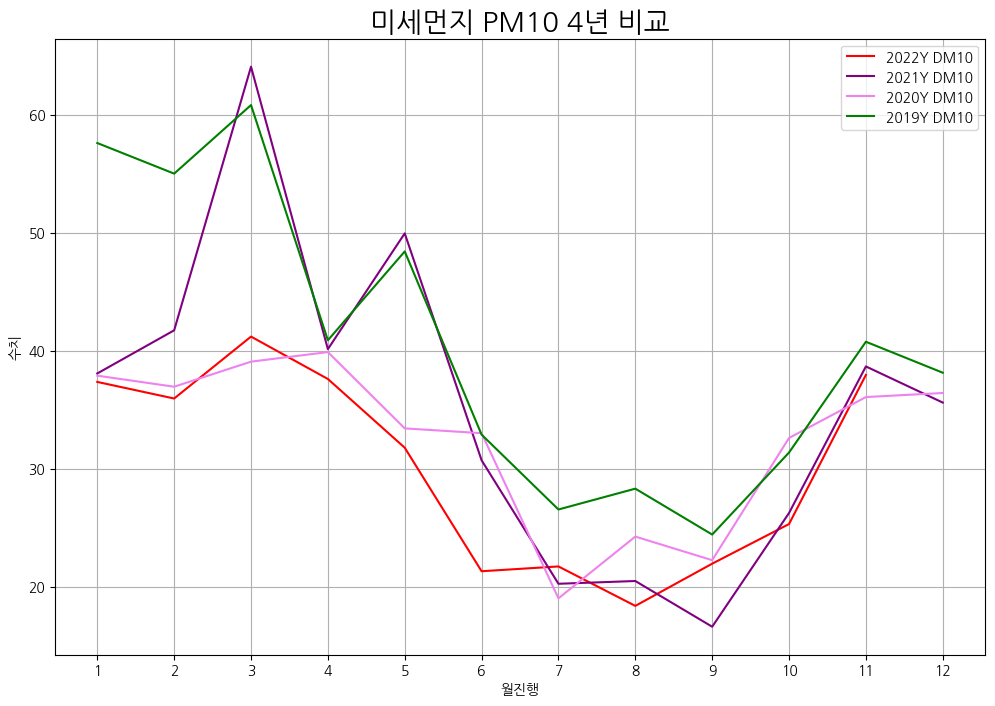

In [351]:
fig, ax = plt.subplots(figsize=(12,8))
ai101.plot(ax = ax, kind = 'line', color = 'Red')
ai102.plot(ax = ax, kind = 'line', color = 'Purple')
ai103.plot(ax = ax, kind = 'line', color = 'Violet')
ai104.plot(ax = ax, kind = 'line', color = 'Green')
ax.set_xlabel('월진행')
ax.set_ylabel('수치')
ax.set_title('미세먼지 PM10 4년 비교', size = 20)
plt.xticks(oldx, newx)
notwat1= ax.get_xticklabels()
plt.grid(True)
fig.savefig('PM10bet.png', dpi=300, bbox_inches='tight')

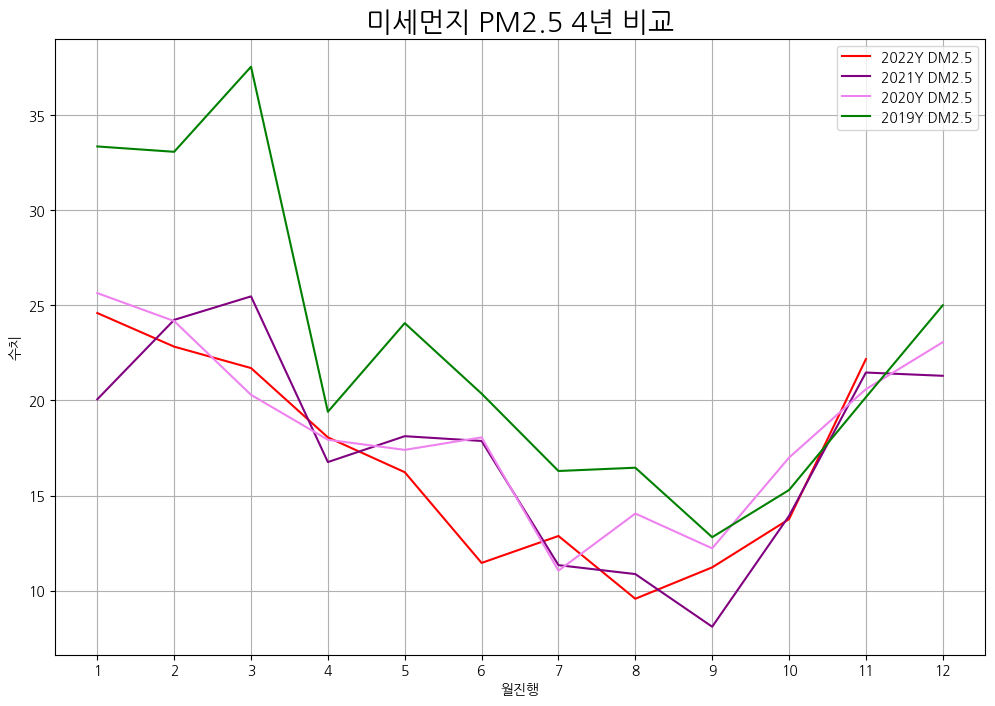

In [352]:
fig, ax = plt.subplots(figsize=(12,8))
ai251.plot(ax = ax, kind = 'line', color = 'Red')
ai252.plot(ax = ax, kind = 'line', color = 'Purple')
ai253.plot(ax = ax, kind = 'line', color = 'Violet')
ai254.plot(ax = ax, kind = 'line', color = 'Green')
ax.set_xlabel('월진행')
ax.set_ylabel('수치')
ax.set_title('미세먼지 PM2.5 4년 비교', size = 20)
plt.xticks(oldx, newx)
notwat2= ax.get_xticklabels()
plt.grid(True)
fig.savefig('PM25bet.png', dpi=300, bbox_inches='tight')

In [ ]:
해당 그래프를 통해 12월의 데이터 있었더라도 평균, 최대값에 영향이 적었을것이라 판단하였습니다. 
그렇기에 3월쯤에 압도적인 수치량을 보여주는 2021년을 기준으로 잡았습니다
2019년의 경우는 초미세먼지 수치가 높긴 하지만 미세먼지 수치는 21년도와 비슷하고, 너무 오래전이라 배제하였습니다.
또한 특히 3월은 전부, DM10은 5월에, DM2.5는 11월에 높았던 것을 확인할 수 있었습니다.

In [123]:
def meanbet(s):
    a = s.iloc[:8]
    b = s[s['시'] == '도평균']
    c = pd.concat([a, b]).set_index(['도'])
    d = c.mean(axis = 1, numeric_only = True).sort_values(ascending = False).astype('float16')
    return d
#도별로 년평균을 구하는 식을 만들어 도별로 비교해보았습니다.

In [124]:
becity = meanbet(air102021)
becity

도
경기도        41.750000
충청남도       41.656250
인천광역시      38.906250
세종특별자치시    38.843750
서울특별시      38.406250
전라북도       38.250000
충청북도       37.250000
대전광역시      35.500000
대구광역시      35.000000
경상북도       34.000000
광주광역시      33.406250
전라남도       32.000000
제주특별자치도    32.000000
부산광역시      31.171875
강원도        30.578125
울산광역시      30.000000
경상남도       29.578125
dtype: float16

In [ ]:
미세먼지 크기가 10일때 지역별로 비교해본결과 경기도 > 충청남도 > 인천 > 세종시 > 서울... 순으로 높았습니다.

In [125]:
wecity = meanbet(air252021)
wecity

도
충청남도       21.171875
경기도        20.828125
인천광역시      20.500000
서울특별시      19.750000
충청북도       19.578125
전라북도       19.421875
광주광역시      18.078125
세종특별자치시    18.078125
대구광역시      17.671875
경상북도       16.671875
대전광역시      16.328125
울산광역시      15.250000
부산광역시      15.250000
경상남도       15.085938
강원도        14.835938
전라남도       14.835938
제주특별자치도    13.585938
dtype: float16

In [ ]:
그러나 미세먼지 크기가 2.5일때는 충청남도 > 경기도 > 인천 > 서울 > 충청북도... 순으로 나타났습니다.
경기도와 충청남도의 크기가 커서 전체지역의 평균을 하다보니 높게 나온것으로 추정하였습니다.

In [126]:
geomen1 = (air102021[air102021['도'] == '경기도']
 .iloc[:-1, 1:]
 .set_index(['시'])
 .mean(axis = 1)
 .sort_values(ascending = False)
 .astype('float16'))
geomen1

시
부천     48.25000
광명     46.65625
평택     46.00000
김포     45.15625
시흥     44.84375
여주     44.15625
안양     43.84375
과천     43.34375
화성     43.00000
수원     42.75000
안산     42.75000
안성     42.75000
하남     42.50000
파주     42.40625
광주     42.25000
군포     41.59375
고양     41.50000
오산     41.09375
이천     40.59375
용인     40.25000
양평     39.25000
구리     39.15625
남양주    39.15625
성남     38.90625
의왕     38.00000
양주     37.59375
의정부    36.50000
가평     34.59375
연천     34.09375
포천     33.90625
동두천    33.00000
dtype: float16

In [127]:
geomen2 = (air252021[air252021['도'] == '경기도']
 .iloc[:-1, 1:]
 .set_index(['시'])
 .mean(axis = 1)
 .sort_values(ascending = False)
 .astype('float16'))
geomen2

시
부천     24.671875
김포     24.578125
평택     24.078125
시흥     23.828125
여주     23.500000
안성     22.671875
광명     22.000000
이천     22.000000
화성     21.921875
파주     21.671875
광주     21.000000
군포     20.500000
용인     20.421875
고양     20.171875
안산     20.078125
양평     19.671875
양주     19.671875
안양     19.500000
포천     19.500000
수원     19.250000
구리     19.078125
오산     18.921875
의정부    18.750000
연천     18.421875
성남     18.328125
과천     18.171875
남양주    18.000000
가평     17.828125
의왕     17.578125
하남     16.328125
동두천    15.585938
dtype: float16

In [128]:
(pd.concat([geomen1,geomen2],axis = 1)
 .rename(columns={0:10,1:2.5})
.reset_index())
#경기도애 시지역들의 년평균을 비교해본 결과 미세먼지의 크기가 10일때 높지만 2.5일때는 평범했던 광명과 달리 부천과 평택 등은 전부다 높게 나왔습니다

,시,10.0,2.5
0,부천,48.25000,24.671875
1,광명,46.65625,22.000000
2,평택,46.00000,24.078125
3,김포,45.15625,24.578125
4,시흥,44.84375,23.828125
5,여주,44.15625,23.500000
6,안양,43.84375,19.500000
7,과천,43.34375,18.171875
8,화성,43.00000,21.921875
9,수원,42.75000,19.250000


In [129]:
chungmen1 = (air102021[air102021['도'] == '충청남도']
 .iloc[:-1, 1:]
 .set_index(['시'])
 .mean(axis = 1)
 .sort_values(ascending = False)
 .astype('float16'))
chungmen1

시
당진    50.00000
아산    46.84375
부여    45.09375
천안    44.09375
보령    42.40625
태안    41.50000
예산    41.00000
서산    40.65625
홍성    39.90625
논산    39.00000
서천    38.50000
공주    37.40625
청양    36.90625
금산    35.40625
계룡    31.50000
dtype: float16

In [130]:
chungmen2 = (air252021[air252021['도'] == '충청남도']
 .iloc[:-1, 1:]
 .set_index(['시'])
 .mean(axis = 1)
 .sort_values(ascending = False)
 .astype('float16'))
chungmen2

시
아산    25.078125
당진    24.000000
예산    23.500000
천안    23.328125
부여    21.828125
홍성    21.500000
공주    21.421875
금산    20.421875
보령    19.828125
청양    19.671875
서산    19.421875
태안    18.500000
논산    18.328125
서천    18.171875
계룡    15.500000
dtype: float16

In [131]:
(pd.concat([chungmen1,chungmen2],axis = 1)
 .rename(columns={0:10,1:2.5})
.reset_index())
#마찬가지로 충남지역을 비교해본결과 타시지역 대비 당진지역과 아산지역이 높게 나왔습니다.

,시,10.0,2.5
0,당진,50.00000,24.000000
1,아산,46.84375,25.078125
2,부여,45.09375,21.828125
3,천안,44.09375,23.328125
4,보령,42.40625,19.828125
5,태안,41.50000,18.500000
6,예산,41.00000,23.500000
7,서산,40.65625,19.421875
8,홍성,39.90625,21.500000
9,논산,39.00000,18.328125


In [133]:
우리나라 내부에서도 미세먼지 수치가 높다면 해당지역에서 영향이 크다면 우리나라 전체도 비슷한 양상일거라 예상하여
최종적으로 수치가 높았던 충청에서 천안 , 경기도에서 수원, 서울, 세종, 인천 지역을 선택하여 
해당 5지역을 기준으로 세밀하게 분석을 진행하였습니다.

In [ ]:
다음에 활용할 데이터셋을 불러왔습니다.
에어코리아의 최종확정 측정자료를 가져왔습니다. 

In [4]:
pollu01 = pd.read_excel('2021년 1월.xlsx')

In [4]:
pollu01.info()
#불러오는데 시간이 좀 걸리긴 했는데 상당히 컸습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437349 entries, 0 to 437348
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      437349 non-null  object 
 1   망       437349 non-null  object 
 2   측정소코드   437349 non-null  int64  
 3   측정소명    437349 non-null  object 
 4   측정일시    437349 non-null  int64  
 5   SO2     417632 non-null  float64
 6   CO      415669 non-null  float64
 7   O3      418339 non-null  float64
 8   NO2     420080 non-null  float64
 9   PM10    416980 non-null  float64
 10  PM25    414176 non-null  float64
 11  주소      437349 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 40.0+ MB


In [5]:
pollu01.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2021010101,0.003,0.4,0.020,0.018,27.0,14.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2021010102,0.003,0.5,0.017,0.021,26.0,14.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2021010103,0.003,0.5,0.014,0.026,25.0,16.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2021010104,0.003,0.4,0.021,0.018,22.0,13.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2021010105,0.003,0.5,0.010,0.029,25.0,13.0,서울 중구 덕수궁길 15


In [6]:
pollu01.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,437349.000000,4.373490e+05,417632.000000,415669.000000,418339.000000,420080.000000,416980.000000,414176.000000
mean,377071.482592,2.021012e+09,0.003292,0.512039,0.021843,0.020624,39.051823,20.495338
std,231517.722984,8.945759e+02,0.001829,0.238469,0.013379,0.015105,26.119573,13.115116
min,111121.000000,2.021010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,131584.000000,2.021011e+09,0.002000,0.400000,0.009000,0.009000,21.000000,11.000000
50%,336221.000000,2.021012e+09,0.003000,0.500000,0.023000,0.016000,32.000000,17.000000
75%,534481.000000,2.021012e+09,0.004000,0.600000,0.033000,0.029000,49.000000,28.000000
max,831495.000000,2.021013e+09,0.146000,6.700000,0.089000,0.200000,462.000000,199.000000


In [5]:
pollu02 = pd.read_excel('2021년 2월.xlsx')
pollu03 = pd.read_excel('2021년 3월.xlsx')
pollu04 = pd.read_excel('2021년 4월.xlsx')
pollu05 = pd.read_excel('2021년 5월.xlsx')
pollu06 = pd.read_excel('2021년 6월.xlsx')
pollu07 = pd.read_excel('2021년 7월.xlsx')
pollu08 = pd.read_excel('2021년 8월.xlsx')
pollu09 = pd.read_excel('2021년 9월.xlsx')
pollu10 = pd.read_excel('2021년 10월.xlsx')
pollu11 = pd.read_excel('2021년 11월.xlsx')
pollu12 = pd.read_excel('2021년 12월.xlsx')
#나머지 11개월치 데이터세트들 전부 불러왔습니다.

In [36]:
#똑같이 데이터의 수가 많기 때문에 5~6개씩 묶어서 제대로 들어왔는지 간단히 확인하였습니다.
pollu02.info(), pollu03.info(), pollu04.info(), pollu05.info(), pollu06.info(), pollu07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400245 entries, 0 to 400244
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      400245 non-null  object 
 1   망       400245 non-null  object 
 2   측정소코드   400245 non-null  int64  
 3   측정소명    400245 non-null  object 
 4   측정일시    400245 non-null  int64  
 5   SO2     379606 non-null  float64
 6   CO      381251 non-null  float64
 7   O3      380396 non-null  float64
 8   NO2     383607 non-null  float64
 9   PM10    384064 non-null  float64
 10  PM25    383434 non-null  float64
 11  주소      400245 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 36.6+ MB


In [53]:
pollu08.info(), pollu09.info(), pollu10.info(), pollu11.info(), pollu12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453096 entries, 0 to 453095
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      453096 non-null  object 
 1   망       453096 non-null  object 
 2   측정소코드   453096 non-null  int64  
 3   측정소명    453096 non-null  object 
 4   측정일시    453096 non-null  int64  
 5   SO2     422269 non-null  float64
 6   CO      421121 non-null  float64
 7   O3      427115 non-null  float64
 8   NO2     421767 non-null  float64
 9   PM10    419694 non-null  float64
 10  PM25    413235 non-null  float64
 11  주소      453096 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 41.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439209 entries, 0 to 439208
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      439209 non-null  object 
 1   망       439209 non-null  object 
 2   측정소코드   439209 non-null  i

(None, None, None, None, None)

In [45]:
pollu02.describe(), pollu03.describe(), pollu04.describe(), pollu05.describe(), pollu06.describe(), pollu07.describe()

(               측정소코드          측정일시            SO2             CO  \
 count  400245.000000  4.002450e+05  379606.000000  381251.000000   
 mean   377660.275149  2.021021e+09       0.003232       0.495492   
 std    230657.076116  8.077655e+02       0.001826       0.226283   
 min    111121.000000  2.021020e+09       0.000000       0.000000   
 25%    131584.000000  2.021021e+09       0.002000       0.300000   
 50%    336223.000000  2.021022e+09       0.003000       0.400000   
 75%    534464.000000  2.021022e+09       0.004000       0.600000   
 max    831495.000000  2.021023e+09       0.201000       6.700000   
 
                   O3            NO2           PM10           PM25  
 count  380396.000000  383607.000000  384064.000000  383434.000000  
 mean        0.029337       0.019233      44.049708      25.683325  
 std         0.015417       0.014549      27.176970      20.703720  
 min         0.000000       0.000000       0.000000       0.000000  
 25%         0.018000       0.00

In [46]:
pollu08.describe(), pollu09.describe(), pollu10.describe(), pollu11.describe(), pollu12.describe()

(               측정소코드          측정일시            SO2             CO  \
 count  453096.000000  4.530960e+05  422269.000000  421121.000000   
 mean   378731.351396  2.021082e+09       0.002618       0.370004   
 std    229404.321238  8.944550e+02       0.001523       0.155092   
 min    111121.000000  2.021080e+09       0.000000       0.000000   
 25%    131601.000000  2.021081e+09       0.002000       0.300000   
 50%    336354.000000  2.021082e+09       0.002000       0.400000   
 75%    534464.000000  2.021082e+09       0.003000       0.500000   
 max    831495.000000  2.021083e+09       0.075000       5.000000   
 
                   O3            NO2           PM10           PM25  
 count  427115.000000  421767.000000  419694.000000  413235.000000  
 mean        0.032339       0.010186      21.710568      11.598156  
 std         0.017667       0.007997      11.963230       7.666151  
 min         0.000000       0.000000       0.000000       0.000000  
 25%         0.019000       0.00

In [47]:
pollu02.head(), pollu03.head(), pollu04.head(), pollu05.head(), pollu06.head(), pollu07.head()

(      지역     망   측정소코드 측정소명        측정일시    SO2   CO     O3    NO2  PM10  PM25  \
 0  서울 중구  도시대기  111121   중구  2021020101  0.004  0.9  0.002  0.068  60.0  28.0   
 1  서울 중구  도시대기  111121   중구  2021020102  0.004  0.9  0.002  0.066  57.0  25.0   
 2  서울 중구  도시대기  111121   중구  2021020103  0.003  0.8  0.002  0.061  58.0  24.0   
 3  서울 중구  도시대기  111121   중구  2021020104  0.003  0.7  0.002  0.057  55.0  21.0   
 4  서울 중구  도시대기  111121   중구  2021020105  0.004  0.8  0.003  0.057  51.0  21.0   
 
               주소  
 0  서울 중구 덕수궁길 15  
 1  서울 중구 덕수궁길 15  
 2  서울 중구 덕수궁길 15  
 3  서울 중구 덕수궁길 15  
 4  서울 중구 덕수궁길 15  ,
       지역     망   측정소코드 측정소명        측정일시    SO2   CO     O3    NO2  PM10  PM25  \
 0  서울 중구  도시대기  111121   중구  2021030101  0.003  0.7  0.002  0.056  39.0  18.0   
 1  서울 중구  도시대기  111121   중구  2021030102  0.003  0.6  0.005  0.048  33.0  17.0   
 2  서울 중구  도시대기  111121   중구  2021030103  0.003  0.4  0.018  0.026  36.0  22.0   
 3  서울 중구  도시대기  111121   중구  2021030104  0.003  0.4  0.0

In [49]:
pollu08.head(), pollu09.head(), pollu10.head(), pollu11.head(), pollu12.head()

(      지역     망   측정소코드 측정소명        측정일시    SO2   CO     O3    NO2  PM10  PM25  \
 0  서울 중구  도시대기  111121   중구  2021080101  0.003  0.4  0.045  0.010  28.0  18.0   
 1  서울 중구  도시대기  111121   중구  2021080102  0.003  0.4  0.042  0.009  26.0  18.0   
 2  서울 중구  도시대기  111121   중구  2021080103  0.003  0.4  0.038  0.010  28.0  21.0   
 3  서울 중구  도시대기  111121   중구  2021080104  0.003  0.4  0.038  0.009  28.0  20.0   
 4  서울 중구  도시대기  111121   중구  2021080105  0.003  0.4  0.041  0.008  32.0  21.0   
 
               주소  
 0  서울 중구 덕수궁길 15  
 1  서울 중구 덕수궁길 15  
 2  서울 중구 덕수궁길 15  
 3  서울 중구 덕수궁길 15  
 4  서울 중구 덕수궁길 15  ,
       지역     망   측정소코드 측정소명        측정일시    SO2   CO     O3    NO2  PM10  PM25  \
 0  서울 중구  도시대기  111121   중구  2021090101  0.003  0.4  0.027  0.012   3.0   2.0   
 1  서울 중구  도시대기  111121   중구  2021090102  0.003  0.3  0.030  0.007   3.0   1.0   
 2  서울 중구  도시대기  111121   중구  2021090103  0.003  0.3  0.030  0.006   3.0   1.0   
 3  서울 중구  도시대기  111121   중구  2021090104  0.003  0.3  0.0

In [ ]:
데이터의 크기가 너무 큰 관계로 원하는 부분만 골라내는 작업을 실시하였습니다. 원하는 조건은,
1.측정위치가 도시대기일것 2.지역이 기상청데이터와 겹치는 강화, 서울, 수원, 세종, 천안일것 
3.이산화황, 일산화탄소, 오존, 이산화질소는 단위가 ppm,
미세먼지 2종은 단위가 ug/m³이므로 단위를 통일할

In [134]:
#우선 원하는 지역과 위치를 골라내었습니다.
def helpmesuperguy(s):
    a = s[s['망'] == '도시대기']
    b = a[a['지역'] == '서울 중구'] 
    c = a[a['지역'] == '경기 수원시']
    d = a[a['지역'] == '세종 세종시']
    e = a[a['지역'] == '인천 강화군']
    f = a[a['지역'] == '충남 천안시']
    g = pd.concat([b,c,d,e,f],axis = 0, join = 'outer').fillna(0)
    return g

In [135]:
pollu01 = helpmesuperguy(pollu01)
pollu02 = helpmesuperguy(pollu02)
pollu03 = helpmesuperguy(pollu03)
pollu04 = helpmesuperguy(pollu04)
pollu05 = helpmesuperguy(pollu05)
pollu06 = helpmesuperguy(pollu06)
pollu07 = helpmesuperguy(pollu07)
pollu08 = helpmesuperguy(pollu08)
pollu09 = helpmesuperguy(pollu09)
pollu10 = helpmesuperguy(pollu10)
pollu11 = helpmesuperguy(pollu11)
pollu12 = helpmesuperguy(pollu12)

In [11]:
(pollu01.info(), pollu02.info(), pollu03.info(), pollu04.info(), pollu05.info(), pollu06.info(), 
 pollu07.info(), pollu08.info(), pollu09.info(), pollu10.info(), pollu11.info(), pollu12.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13392 entries, 0 to 310868
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      13392 non-null  object 
 1   망       13392 non-null  object 
 2   측정소코드   13392 non-null  int64  
 3   측정소명    13392 non-null  object 
 4   측정일시    13392 non-null  int64  
 5   SO2     13392 non-null  float64
 6   CO      13392 non-null  float64
 7   O3      13392 non-null  float64
 8   NO2     13392 non-null  float64
 9   PM10    13392 non-null  float64
 10  PM25    13392 non-null  float64
 11  주소      13392 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12096 entries, 0 to 284543
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      12096 non-null  object 
 1   망       12096 non-null  object 
 2   측정소코드   12096 non-null  int64  
 3   측정소명    12

(None, None, None, None, None, None, None, None, None, None, None, None)

In [ ]:
#데이터 압축이 잘 이뤄졌다는 걸 확인할 수 있었습니다.

In [136]:
totpollu = pd.concat([pollu01, pollu02, pollu03, pollu04, pollu05, pollu06, 
                      pollu07, pollu08, pollu09, pollu10, pollu11, pollu12])
#12개의 데이터세트를 변동하기 용이하게 합쳤습니다.

In [95]:
totpollu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157680 entries, 0 to 325260
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      157680 non-null  object 
 1   망       157680 non-null  object 
 2   측정소코드   157680 non-null  int64  
 3   측정소명    157680 non-null  object 
 4   측정일시    157680 non-null  int64  
 5   SO2     157680 non-null  float64
 6   CO      157680 non-null  float64
 7   O3      157680 non-null  float64
 8   NO2     157680 non-null  float64
 9   PM10    157680 non-null  float64
 10  PM25    157680 non-null  float64
 11  주소      157680 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 15.6+ MB


In [771]:
totpollu.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,157680.000000,1.576800e+05,157680.000000,157680.000000,157680.000000,157680.000000,157680.000000,157680.000000
mean,387628.777778,2.021067e+09,0.002950,0.458985,0.030089,0.018664,39.480156,18.872095
std,246927.649422,3.450030e+04,0.001163,0.198077,0.021426,0.014104,49.281163,17.786904
min,111121.000000,2.021010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,131114.000000,2.021040e+09,0.002000,0.400000,0.013000,0.009000,18.000000,7.000000
50%,534111.500000,2.021070e+09,0.003000,0.400000,0.029000,0.015000,30.000000,14.000000
75%,541112.000000,2.021100e+09,0.004000,0.600000,0.043000,0.025000,48.000000,25.000000
max,823802.000000,2.021123e+09,0.067000,2.500000,0.159000,0.114000,1207.000000,240.000000


In [98]:
totpollu.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2021010101,8.0,466.7,40.0,34.5,27.0,14.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2021010102,8.0,583.3,34.0,40.2,26.0,14.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2021010103,8.0,583.3,28.0,49.8,25.0,16.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2021010104,8.0,466.7,42.0,34.5,22.0,13.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2021010105,8.0,583.3,20.0,55.6,25.0,13.0,서울 중구 덕수궁길 15


In [ ]:
ppm 단위를 미세먼지와 같은 단위인 ug/m³로 변경하고자 할경우,
ppm값 * 분자량 / 1mol당 기체부피 * 1000이었습니다.
이때 계산상 편의를 위해 약 20도 1기압으로 기체부피를 24로 정의하였고,
분자량이 각각 이산화황(SO2)이 64, 일산화탄소(CO)가 28, 오존(O3)이 48, 이산화질소(NO2)가 46이었습니다.

In [137]:
def unityt (s):
    a = s.copy()
    a['SO2'] = (a['SO2']*64/24*1000).round(1)
    a['CO'] = (a['CO']*28/24*1000).round(1)
    a['NO2'] = (a['NO2']*46/24*1000).round(1)
    a['O3'] = (a['O3']*48/24*1000).round(1)
    return a

In [138]:
unipollu = unityt(totpollu)

In [783]:
unipollu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157680 entries, 0 to 325260
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   지역      157680 non-null  object 
 1   망       157680 non-null  object 
 2   측정소코드   157680 non-null  int64  
 3   측정소명    157680 non-null  object 
 4   측정일시    157680 non-null  int64  
 5   SO2     157680 non-null  float64
 6   CO      157680 non-null  float64
 7   O3      157680 non-null  float64
 8   NO2     157680 non-null  float64
 9   PM10    157680 non-null  float64
 10  PM25    157680 non-null  float64
 11  주소      157680 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 15.6+ MB


In [784]:
unipollu.describe()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
count,157680.000000,1.576800e+05,157680.000000,157680.000000,157680.000000,157680.000000,157680.000000,157680.000000
mean,387628.777778,2.021067e+09,7.863018,535.486084,60.177664,35.767995,39.480156,18.872095
std,246927.649422,3.450030e+04,3.113158,231.088035,42.851621,27.032526,49.281163,17.786904
min,111121.000000,2.021010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,131114.000000,2.021040e+09,5.300000,466.700000,26.000000,17.200000,18.000000,7.000000
50%,534111.500000,2.021070e+09,8.000000,466.700000,58.000000,28.700000,30.000000,14.000000
75%,541112.000000,2.021100e+09,10.700000,700.000000,86.000000,47.900000,48.000000,25.000000
max,823802.000000,2.021123e+09,178.700000,2916.700000,318.000000,218.500000,1207.000000,240.000000


In [775]:
unipollu.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2021010101,8.0,466.7,40.0,34.5,27.0,14.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2021010102,8.0,583.3,34.0,40.2,26.0,14.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2021010103,8.0,583.3,28.0,49.8,25.0,16.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2021010104,8.0,466.7,42.0,34.5,22.0,13.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2021010105,8.0,583.3,20.0,55.6,25.0,13.0,서울 중구 덕수궁길 15


In [776]:
totpollu.head()

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 중구,도시대기,111121,중구,2021010101,0.003,0.4,0.020,0.018,27.0,14.0,서울 중구 덕수궁길 15
1,서울 중구,도시대기,111121,중구,2021010102,0.003,0.5,0.017,0.021,26.0,14.0,서울 중구 덕수궁길 15
2,서울 중구,도시대기,111121,중구,2021010103,0.003,0.5,0.014,0.026,25.0,16.0,서울 중구 덕수궁길 15
3,서울 중구,도시대기,111121,중구,2021010104,0.003,0.4,0.021,0.018,22.0,13.0,서울 중구 덕수궁길 15
4,서울 중구,도시대기,111121,중구,2021010105,0.003,0.5,0.010,0.029,25.0,13.0,서울 중구 덕수궁길 15


In [139]:
unipollu = unipollu.iloc[:,[0,4,5,6,7,8,9,10]].reset_index(drop = True)
#분석에 있어 필요없는 망위치, 측정소코드, 측정소명, 주소는 데이터프레임에서 배제하였습니다.

In [140]:
np.finfo('float32')

finfo(resolution=1e-06, min=-3.4028235e+38, max=3.4028235e+38, dtype=float32)

In [141]:
unipollu[['SO2']] = unipollu[['SO2']].astype('float32')
unipollu[['CO']] = unipollu[['CO']].astype('float32')
unipollu[['O3']] = unipollu[['O3']].astype('float32')
unipollu[['NO2']] = unipollu[['NO2']].astype('float32')
unipollu[['PM10']] = unipollu[['PM10']].astype('float32')
unipollu[['PM25']] = unipollu[['PM25']].astype('float32')
#데이터의 용량을 조금이나만 줄이기위하여 데이터타입을 바꿔주었습니다.

In [142]:
unipollu['OTHERTO'] = unipollu['SO2'].add(unipollu['CO']).add(unipollu['O3']).add(unipollu['NO2']).add(unipollu['PM10']).add(unipollu['PM25'])
#전체 데이터셋에서 전체 오염물질들의 총합을 구한 열을 추가합니다.

In [143]:
unipollu['DUSTTO'] = unipollu['PM10'].add(unipollu['PM25'])
#전체 데이터셋에서 미세먼지들의 총합을 구한 열을 추가합니다.

In [144]:
unipollu['RATI'] = ((unipollu['DUSTTO'] / unipollu['OTHERTO']) * 100).fillna(0)
#만들어진 해당 열을 통해 타오염물질대비 미세먼지 비율을 알 수 있었습니다

In [21]:
unipollu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157680 entries, 0 to 157679
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   지역       157680 non-null  object 
 1   측정일시     157680 non-null  int64  
 2   SO2      157680 non-null  float32
 3   CO       157680 non-null  float32
 4   O3       157680 non-null  float32
 5   NO2      157680 non-null  float32
 6   PM10     157680 non-null  float32
 7   PM25     157680 non-null  float32
 8   OTHERTO  157680 non-null  float32
 9   DUSTTO   157680 non-null  float32
 10  RATI     157680 non-null  float32
dtypes: float32(9), int64(1), object(1)
memory usage: 7.8+ MB


In [794]:
unipollu.describe()

,측정일시,SO2,CO,O3,NO2,PM10,PM25,OTHERTO,DUSTTO,RATI
count,1.576800e+05,157680.000000,157680.000000,157680.000000,157680.000000,157680.000000,157680.000000,157680.000000,157680.000000,157680.000000
mean,2.021067e+09,7.863019,535.486023,60.177662,35.767998,39.480156,18.872095,697.647034,58.352253,7.868103
std,3.450030e+04,3.112825,231.093094,42.850178,27.029137,49.282249,17.785080,275.302826,62.674870,7.068666
min,2.021010e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.021040e+09,5.300000,466.700012,26.000000,17.200001,18.000000,7.000000,553.400024,27.000000,4.463610
50%,2.021070e+09,8.000000,466.700012,58.000000,28.700001,30.000000,14.000000,665.000000,45.000000,6.748733
75%,2.021100e+09,10.700000,700.000000,86.000000,47.900002,48.000000,25.000000,834.200012,72.000000,9.625117
max,2.021123e+09,178.699997,2916.699951,318.000000,218.500000,1207.000000,240.000000,3249.500000,1312.000000,100.000000


In [145]:
unipollu['지역'].unique()
#지역 종류를 확인하였습니다.

array(['서울 중구', '경기 수원시', '세종 세종시', '인천 강화군', '충남 천안시'], dtype=object)

In [146]:
import datetime

In [147]:
def whattimeisit(w):
    w = str(w)
    a = w[:4] + '-' + w[4:6] + '-' + w[6:8] + ' ' + w[8:10] + ':00'
    if a[-5:] == '24:00':
        date = pd.to_datetime(a[:10]) + pd.DateOffset(days=1)
        b = str(date)[:-8] + '00:00'
        return b
    else:
        return a

In [148]:
seototol = unipollu[unipollu['지역'] == '서울 중구'].sort_values('측정일시')

In [149]:
seototol['측정일시'] = seototol['측정일시'].apply(whattimeisit)

In [150]:
seototol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 145031
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지역       8760 non-null   object 
 1   측정일시     8760 non-null   object 
 2   SO2      8760 non-null   float32
 3   CO       8760 non-null   float32
 4   O3       8760 non-null   float32
 5   NO2      8760 non-null   float32
 6   PM10     8760 non-null   float32
 7   PM25     8760 non-null   float32
 8   OTHERTO  8760 non-null   float32
 9   DUSTTO   8760 non-null   float32
 10  RATI     8760 non-null   float32
dtypes: float32(9), object(2)
memory usage: 513.3+ KB


In [151]:
seototol['측정일시'] = pd.to_datetime(seototol['측정일시'])

In [153]:
seototol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 145031
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지역       8760 non-null   object        
 1   측정일시     8760 non-null   datetime64[ns]
 2   SO2      8760 non-null   float32       
 3   CO       8760 non-null   float32       
 4   O3       8760 non-null   float32       
 5   NO2      8760 non-null   float32       
 6   PM10     8760 non-null   float32       
 7   PM25     8760 non-null   float32       
 8   OTHERTO  8760 non-null   float32       
 9   DUSTTO   8760 non-null   float32       
 10  RATI     8760 non-null   float32       
dtypes: datetime64[ns](1), float32(9), object(1)
memory usage: 513.3+ KB


In [154]:
suwtotol = unipollu[unipollu['지역'] == '경기 수원시'].sort_values('측정일시')

In [155]:
suwtotol['측정일시'] = suwtotol['측정일시'].apply(whattimeisit)

In [156]:
suwtotol['측정일시'] = pd.to_datetime(suwtotol['측정일시'])

In [158]:
suwtotol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61320 entries, 744 to 150239
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지역       61320 non-null  object        
 1   측정일시     61320 non-null  datetime64[ns]
 2   SO2      61320 non-null  float32       
 3   CO       61320 non-null  float32       
 4   O3       61320 non-null  float32       
 5   NO2      61320 non-null  float32       
 6   PM10     61320 non-null  float32       
 7   PM25     61320 non-null  float32       
 8   OTHERTO  61320 non-null  float32       
 9   DUSTTO   61320 non-null  float32       
 10  RATI     61320 non-null  float32       
dtypes: datetime64[ns](1), float32(9), object(1)
memory usage: 3.5+ MB


In [159]:
jontotol = unipollu[unipollu['지역'] == '세종 세종시'].sort_values('측정일시')

In [160]:
jontotol['측정일시'] = jontotol['측정일시'].apply(whattimeisit)

In [161]:
jontotol['측정일시'] = pd.to_datetime(jontotol['측정일시'])

In [163]:
jontotol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35040 entries, 5952 to 153215
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지역       35040 non-null  object        
 1   측정일시     35040 non-null  datetime64[ns]
 2   SO2      35040 non-null  float32       
 3   CO       35040 non-null  float32       
 4   O3       35040 non-null  float32       
 5   NO2      35040 non-null  float32       
 6   PM10     35040 non-null  float32       
 7   PM25     35040 non-null  float32       
 8   OTHERTO  35040 non-null  float32       
 9   DUSTTO   35040 non-null  float32       
 10  RATI     35040 non-null  float32       
dtypes: datetime64[ns](1), float32(9), object(1)
memory usage: 2.0+ MB


In [164]:
inctotol = unipollu[unipollu['지역'] == '인천 강화군'].sort_values('측정일시')

In [165]:
inctotol['측정일시'] = inctotol['측정일시'].apply(whattimeisit)

In [166]:
inctotol['측정일시'] = pd.to_datetime(inctotol['측정일시'])

In [168]:
inctotol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17520 entries, 8928 to 154703
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지역       17520 non-null  object        
 1   측정일시     17520 non-null  datetime64[ns]
 2   SO2      17520 non-null  float32       
 3   CO       17520 non-null  float32       
 4   O3       17520 non-null  float32       
 5   NO2      17520 non-null  float32       
 6   PM10     17520 non-null  float32       
 7   PM25     17520 non-null  float32       
 8   OTHERTO  17520 non-null  float32       
 9   DUSTTO   17520 non-null  float32       
 10  RATI     17520 non-null  float32       
dtypes: datetime64[ns](1), float32(9), object(1)
memory usage: 1.0+ MB


In [169]:
chutotol = unipollu[unipollu['지역'] == '충남 천안시'].sort_values('측정일시')

In [170]:
chutotol['측정일시'] = chutotol['측정일시'].apply(whattimeisit)

In [171]:
chutotol['측정일시'] = pd.to_datetime(chutotol['측정일시'])

In [173]:
chutotol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35040 entries, 10416 to 157679
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   지역       35040 non-null  object        
 1   측정일시     35040 non-null  datetime64[ns]
 2   SO2      35040 non-null  float32       
 3   CO       35040 non-null  float32       
 4   O3       35040 non-null  float32       
 5   NO2      35040 non-null  float32       
 6   PM10     35040 non-null  float32       
 7   PM25     35040 non-null  float32       
 8   OTHERTO  35040 non-null  float32       
 9   DUSTTO   35040 non-null  float32       
 10  RATI     35040 non-null  float32       
dtypes: datetime64[ns](1), float32(9), object(1)
memory usage: 2.0+ MB


In [175]:
각 지역별로 처리된 데이터셋을 만들었습니다.

In [176]:
print(365*24)

8760


In [ ]:
1년을 시간단위로 나누면 8760시간이 되는데 서울에 비해 다른 지역은
길이가 다른 점을 확인하였습니다

In [ ]:
데이터들을 확인해본결과, 지역별로 길이및 측정일시가 겹치는 문제가 있어 
확인해보았더니 같은 시내에도 여러 동에거친 데이터들이 있어 측정일시가 겹치는 것으로 확인하였습니다. 
그리하여 각 일자별로 평균을 내어 길이를 맞추었습니다.

In [177]:
soeul1 = seototol.iloc[:, 1:]

In [178]:
soeul1[seototol['RATI'] == 100] = soeul1[seototol['RATI'] == 100].replace(100, 0)

In [179]:
soeul1.describe()

,SO2,CO,O3,NO2,PM10,PM25,OTHERTO,DUSTTO,RATI
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,8.737579,546.727112,51.978081,50.765629,41.229565,20.495548,719.933533,61.725113,7.758060
std,2.493740,216.197571,37.145798,29.588631,50.925632,17.566368,263.634735,65.062172,5.076846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,350.000000,24.000000,28.700001,20.000000,10.000000,557.600037,30.000000,5.038090
50%,8.000000,466.700012,48.000000,44.099998,31.000000,16.000000,657.450012,48.000000,7.028818
75%,10.700000,583.299988,70.000000,69.000000,48.000000,25.000000,846.200012,74.000000,9.536222
max,29.299999,2216.699951,284.000000,187.800003,1024.000000,172.000000,2435.699951,1196.000000,68.806816


In [ ]:
또한 서울의 경우 비율이 미세먼지의 비율이 100인 구간이 있었는데, 
이는 다른 오염물질은 특정 원인으로 조사가 되지 못하고 미세먼지만 조사된 이상치로 판단,
제거하였습니다.

In [180]:
sowun1 = suwtotol.groupby('측정일시').mean(numeric_only = True)

In [181]:
sowun1.describe().isna().sum().sum()

0

In [182]:
sejon1 = jontotol.groupby('측정일시').mean(numeric_only = True)

In [183]:
inchu1 = inctotol.groupby('측정일시').mean(numeric_only = True)

In [184]:
chuan1 = chutotol.groupby('측정일시').mean(numeric_only = True)

In [185]:
soeul1.info(), sowun1.info(), sejon1.info(), inchu1.info(), chuan1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8760 entries, 0 to 145031
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   측정일시     8760 non-null   datetime64[ns]
 1   SO2      8760 non-null   float32       
 2   CO       8760 non-null   float32       
 3   O3       8760 non-null   float32       
 4   NO2      8760 non-null   float32       
 5   PM10     8760 non-null   float32       
 6   PM25     8760 non-null   float32       
 7   OTHERTO  8760 non-null   float32       
 8   DUSTTO   8760 non-null   float32       
 9   RATI     8760 non-null   float32       
dtypes: datetime64[ns](1), float32(9)
memory usage: 444.8 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 01:00:00 to 2022-01-01 00:00:00
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SO2      8760 non-null   float32
 1   CO       8760 non-null   floa

(None, None, None, None, None)

In [186]:
soeul1.describe(), sowun1.describe(), inchu1.describe(), chuan1.describe(), sejon1.describe()

(               SO2           CO           O3          NO2         PM10  \
 count  8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
 mean      8.737579   546.727112    51.978081    50.765629    41.229565   
 std       2.493740   216.197571    37.145798    29.588631    50.925632   
 min       0.000000     0.000000     0.000000     0.000000     0.000000   
 25%       8.000000   350.000000    24.000000    28.700001    20.000000   
 50%       8.000000   466.700012    48.000000    44.099998    31.000000   
 75%      10.700000   583.299988    70.000000    69.000000    48.000000   
 max      29.299999  2216.699951   284.000000   187.800003  1024.000000   
 
               PM25      OTHERTO       DUSTTO         RATI  
 count  8760.000000  8760.000000  8760.000000  8760.000000  
 mean     20.495548   719.933533    61.725113     7.758060  
 std      17.566368   263.634735    65.062172     5.076846  
 min       0.000000     0.000000     0.000000     0.000000  
 25%      10.00000

In [ ]:
서울의 경우만 groupby를 적용하지 않아 인덱스에 측정일시가 안들어간것을 확인하였습니다

In [187]:
soeul1 = soeul1.set_index('측정일시')

In [188]:
soeul1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2021-01-01 01:00:00 to 2022-01-01 00:00:00
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SO2      8760 non-null   float32
 1   CO       8760 non-null   float32
 2   O3       8760 non-null   float32
 3   NO2      8760 non-null   float32
 4   PM10     8760 non-null   float32
 5   PM25     8760 non-null   float32
 6   OTHERTO  8760 non-null   float32
 7   DUSTTO   8760 non-null   float32
 8   RATI     8760 non-null   float32
dtypes: float32(9)
memory usage: 376.4 KB


In [ ]:
길이가 전부 통일된것을 확인할수 있습니다.
문제또한 없어 보입니다

Text(0.5, 0.98, 'Monthly Boxplots')

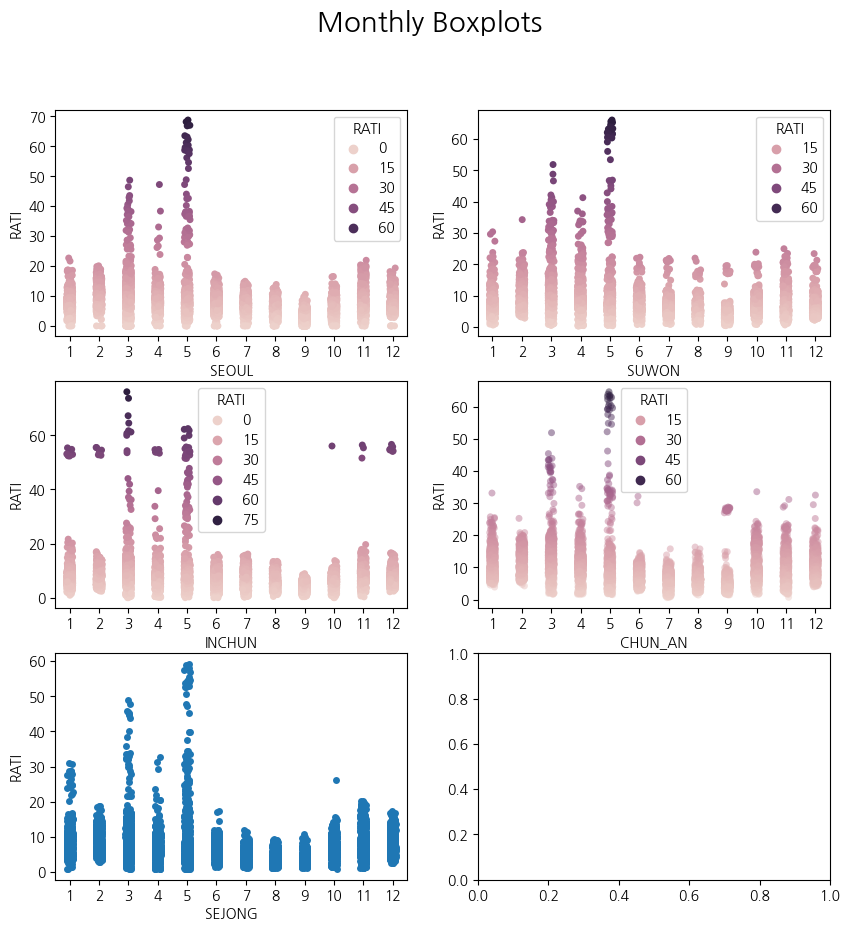

In [697]:
figure, ax = plt.subplots(figsize=(10,10),ncols = 2, nrows = 3)
sns.stripplot(data = soeul1,
             x = soeul1.index.month,
             y = 'RATI',
             hue = 'RATI',
             ax = ax[0,0]).set(xlabel='SEOUL')
sns.stripplot(data = sowun1,
             x = sowun1.index.month,
             y = 'RATI',
             hue = 'RATI',
             ax = ax[0,1]).set(xlabel='SUWON')
sns.stripplot(data = sejon1,
             x = sejon1.index.month,
             y = 'RATI',
             ax = ax[2,0]).set(xlabel='SEJONG')
sns.stripplot(data = inchu1,
             x = inchu1.index.month,
             y = 'RATI',
             hue = 'RATI',
             ax = ax[1,0]).set(xlabel='INCHUN')
sns.stripplot(data = chuan1,
             x = chuan1.index.month,
             y = 'RATI', alpha = 0.5,
             hue = 'RATI',
             ax = ax[1,1]).set(xlabel='CHUN_AN')
plt.suptitle('Monthly Boxplots', size = 20)


In [ ]:
그래프를 통해 월별로 지역마다 미세먼지 비율이 높았던 달수를 알 수 있었습니다.
전체적으로 3월이 제일 높고, 9월이 제일 낮은 점을 확인할 수 있습니다

In [ ]:
각 오염수치끼리 상관분석도 진행해보기로 하였습니다

In [232]:
corseoul = soeul1.iloc[:,:7].corr()
corinchu = inchu1.iloc[:,:7].corr()
corsejon = sejon1.iloc[:,:7].corr()
corsuwon = sowun1.iloc[:,:7].corr()
corchuan = chuan1.iloc[:,:7].corr()

In [199]:
corseoul, corinchu, corsejon, corsuwon, corchuan

(              SO2        CO        O3       NO2      PM10      PM25   OTHERTO
 SO2      1.000000  0.446767  0.074922  0.374082  0.127282  0.337210  0.475436
 CO       0.446767  1.000000 -0.383631  0.827669  0.299706  0.603369  0.961232
 O3       0.074922 -0.383631  1.000000 -0.516464 -0.004704 -0.030154 -0.233880
 NO2      0.374082  0.827669 -0.516464  1.000000  0.242319  0.486827  0.800996
 PM10     0.127282  0.299706 -0.004704  0.242319  1.000000  0.743986  0.516257
 PM25     0.337210  0.603369 -0.030154  0.486827  0.743986  1.000000  0.758729
 OTHERTO  0.475436  0.961232 -0.233880  0.800996  0.516257  0.758729  1.000000,
               SO2        CO        O3       NO2      PM10      PM25   OTHERTO
 SO2      1.000000  0.565730 -0.018033  0.545084  0.251237  0.440343  0.591719
 CO       0.565730  1.000000 -0.279237  0.728739  0.389132  0.728507  0.965887
 O3      -0.018033 -0.279237  1.000000 -0.433601  0.009504 -0.044975 -0.106691
 NO2      0.545084  0.728739 -0.433601  1.000000  0

In [ ]:
상관분석을 완료하였고, 그래프로 나타내었습니다
또한 그래프과정에서 비율은 필요 없을것이라 제외하였습니다

In [235]:
def hethat(w):
    figure, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(w, dtype=bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(w, annot=True, cmap='YlGn',
           mask = mask, ax = ax, square = True,
           )
#그래프 과정을 함수로 간편하게 만들었습니다

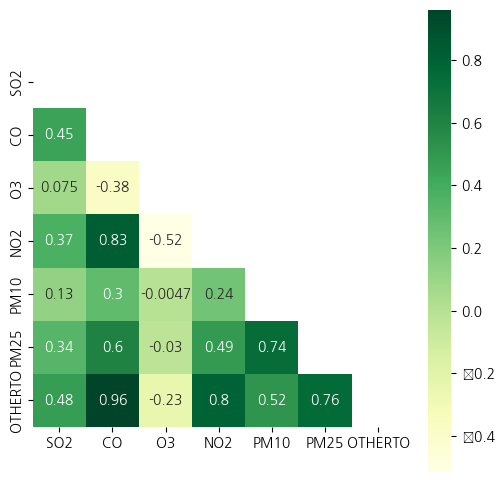

In [236]:
hethat(corseoul)

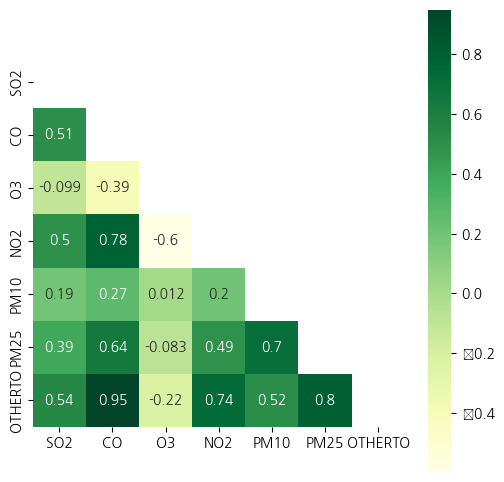

In [237]:
hethat(corsuwon)

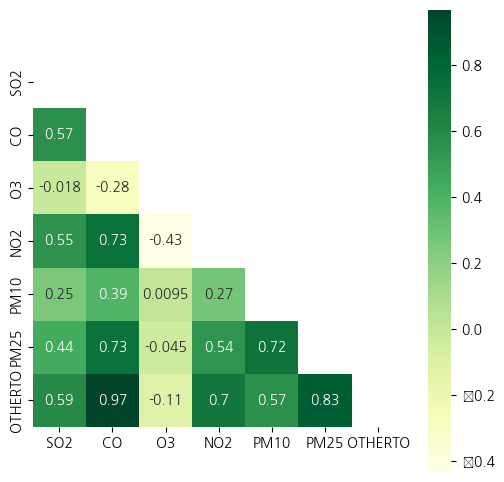

In [238]:
hethat(corinchu)

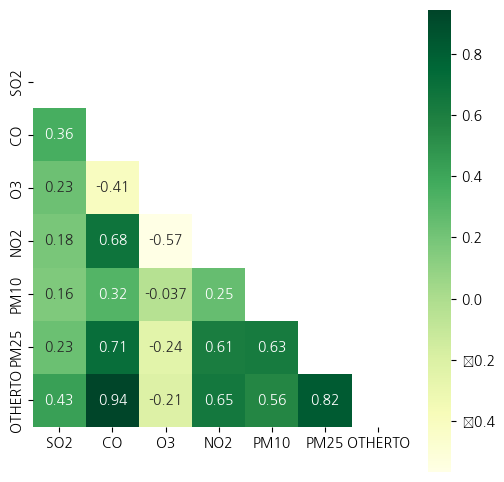

In [239]:
hethat(corsejon)

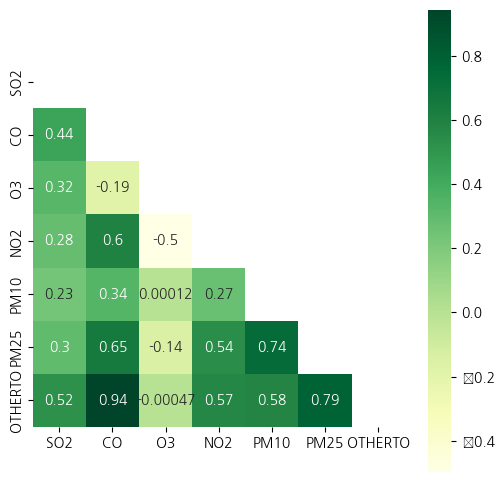

In [240]:
hethat(corchuan)

In [ ]:
전체적으로 미세먼지가 상관도는 높을거라 예상한 그대로였지만,
전체 오염물질 비율은 일산화탄소가 높았고, 
서울과 수원 지역에서는 일산화탄소와 이산화질소의 상관도가 높았던점이
눈에 띄었습니다
또한 일산화탄소와 2.5크기 미세먼지, 이산화질소와 10크기 미세먼지도 어느정도 상관성을 확인하였습니다

In [ ]:
일산화탄소의 주 배출원 = 산업공정, 담배 등
이산화질소 주 배출원 = 도로, 제조 등
그렇다면 중국외 우리나라에서 미세먼지 주 배출원은 무엇인가

In [ ]:
중국의 영향을 파악하기 위해 기상청의 풍향 데이터를 준비하였습니다
서풍이면 영향이 있다고 할 수 있지만 그 외 풍향이라면 중국에서 유입이 없을수밖에 없기 때문입니다

In [396]:
windch = pd.read_csv('기상천안.csv', encoding = 'euc-kr')
windse = pd.read_csv('기상서울.csv', encoding = 'euc-kr')
windsu = pd.read_csv('기상수원.csv', encoding = 'euc-kr')
windin = pd.read_csv('기상인천.csv', encoding = 'euc-kr')
windsj = pd.read_csv('기상세종.csv', encoding = 'euc-kr')

In [397]:
windch.head(), windse.head(), windsu.head(), windin.head(), windsj.head()

(    지점 지점명               일시  풍속(m/s)  풍속 QC플래그  풍향(16방위)  풍향 QC플래그
 0  232  천안  2021-01-01 1:00      0.4       NaN       0.0       NaN
 1  232  천안  2021-01-01 2:00      0.3       NaN       0.0       NaN
 2  232  천안  2021-01-01 3:00      0.2       NaN       0.0       NaN
 3  232  천안  2021-01-01 4:00      0.5       NaN      90.0       NaN
 4  232  천안  2021-01-01 5:00      0.0       NaN       0.0       NaN,
     지점 지점명                일시  기온(°C)  풍속(m/s)  풍속 QC플래그  풍향(16방위)  풍향 QC플래그
 0  108  서울  2021-01-01 01:00    -8.7      2.4       NaN     270.0       NaN
 1  108  서울  2021-01-01 02:00    -9.1      1.6       NaN     270.0       NaN
 2  108  서울  2021-01-01 03:00    -9.3      1.1       NaN     250.0       NaN
 3  108  서울  2021-01-01 04:00    -9.3      0.3       NaN       0.0       NaN
 4  108  서울  2021-01-01 05:00    -9.7      1.9       NaN      20.0       NaN,
     지점 지점명               일시  풍속(m/s)  풍속 QC플래그  풍향(16방위)  풍향 QC플래그  \
 0  119  수원  2021-01-01 1:00      0.9       NaN       320

In [398]:
windch.info(), windse.info(), windsu.info(), windsj.info(), windin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8745 entries, 0 to 8744
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        8745 non-null   int64  
 1   지점명       8745 non-null   object 
 2   일시        8745 non-null   object 
 3   풍속(m/s)   8737 non-null   float64
 4   풍속 QC플래그  10 non-null     float64
 5   풍향(16방위)  8737 non-null   float64
 6   풍향 QC플래그  10 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 478.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        8760 non-null   int64  
 1   지점명       8760 non-null   object 
 2   일시        8760 non-null   object 
 3   기온(°C)    8760 non-null   float64
 4   풍속(m/s)   8758 non-null   float64
 5   풍속 QC플래그  2 non-null      float64
 6   풍향(16방위)  8758 non-null   float64
 7   풍향 QC플래그  2 non-n

(None, None, None, None, None)

In [207]:
windch.describe(), windin.describe(), windse.describe(), windsu.describe(), windsj.describe()

(           지점      풍속(m/s)  풍속 QC플래그     풍향(16방위)  풍향 QC플래그
 count  8745.0  8737.000000      10.0  8737.000000      10.0
 mean    232.0     1.301431       9.0   127.787570       9.0
 std       0.0     1.184798       0.0   113.792803       0.0
 min     232.0     0.000000       9.0     0.000000       9.0
 25%     232.0     0.300000       9.0     0.000000       9.0
 50%     232.0     1.000000       9.0   110.000000       9.0
 75%     232.0     2.000000       9.0   250.000000       9.0
 max     232.0     7.800000       9.0   360.000000       9.0,
            지점      풍속(m/s)  풍속 QC플래그     풍향(16방위)  풍향 QC플래그
 count  8760.0  8760.000000       0.0  8760.000000       0.0
 mean    201.0     1.823721       NaN   167.261416       NaN
 std       0.0     1.297234       NaN   121.758813       NaN
 min     201.0     0.000000       NaN     0.000000       NaN
 25%     201.0     0.900000       NaN    50.000000       NaN
 50%     201.0     1.600000       NaN   160.000000       NaN
 75%     201.0     2.60

In [381]:
windse.isna().sum()

지점            0
지점명           0
일시            0
기온(°C)        0
풍속(m/s)       0
풍속 QC플래그    144
풍향(16방위)      0
풍향 QC플래그    144
dtype: int64

In [405]:
colcolmm = ['지점명' , '일시', '풍속(m/s)', '풍향(16방위)']

In [400]:
windse = windse[colcolmm].fillna(0)

In [385]:
windse.isna().sum()

지점명         0
일시          0
풍속(m/s)     0
풍향(16방위)    0
기온(°C)      0
dtype: int64

In [406]:
windin = windin[colcolmm].fillna(0)
windsu = windsu[colcolmm].fillna(0)
windsj = windsj[colcolmm].fillna(0)
windch = windch[colcolmm].fillna(0)

In [407]:
windse['일시'] = pd.to_datetime(windse['일시'])

In [387]:
windse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   지점명       144 non-null    object        
 1   일시        144 non-null    datetime64[ns]
 2   풍속(m/s)   144 non-null    float64       
 3   풍향(16방위)  144 non-null    int64         
 4   기온(°C)    144 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 5.8+ KB


In [408]:
windsj['일시'] = pd.to_datetime(windsj['일시'])
windsu['일시'] = pd.to_datetime(windsu['일시'])
windin['일시'] = pd.to_datetime(windin['일시'])
windch['일시'] = pd.to_datetime(windch['일시'])

In [ ]:
서풍일시 1, 그외는 0으로 풍향 재정립

In [246]:
def westiswhere(w):
    if w > 330 :
        return 0
    elif w < 240 :
        return 0
    else :
        return 1

In [389]:
windse['풍향(16방위)'].apply(westiswhere).isna().sum()

0

In [409]:
windse['풍향(16방위)'] = windse['풍향(16방위)'].apply(westiswhere)
windsj['풍향(16방위)'] = windsj['풍향(16방위)'].apply(westiswhere)
windsu['풍향(16방위)'] = windsu['풍향(16방위)'].apply(westiswhere)
windin['풍향(16방위)'] = windin['풍향(16방위)'].apply(westiswhere)
windch['풍향(16방위)'] = windch['풍향(16방위)'].apply(westiswhere)


In [219]:
windse.head()

,지점명,일시,풍속(m/s),풍향(16방위)
0,서울,2021-01-01 01:00:00,2.4,1
1,서울,2021-01-01 02:00:00,1.6,1
2,서울,2021-01-01 03:00:00,1.1,1
3,서울,2021-01-01 04:00:00,0.3,0
4,서울,2021-01-01 05:00:00,1.9,0


In [ ]:
이러한 풍향데이터와 위의 오염물질 데이터가 datetime 단위가 시간별로 같기 때문에
합치기를 진행하였습니다.

In [410]:
SEOUL = pd.concat([soeul1, windse.set_index('일시')], axis=1).reset_index().rename(columns = {'index': '일시'})
SUWON = pd.concat([sowun1, windsu.set_index('일시')], axis=1).reset_index().rename(columns = {'index': '일시'})
SEJON = pd.concat([sejon1, windsj.set_index('일시')], axis=1).reset_index().rename(columns = {'index': '일시'})
INCHU = pd.concat([inchu1, windin.set_index('일시')], axis=1).reset_index().rename(columns = {'index': '일시'})
CHUAN = pd.concat([chuan1, windch.set_index('일시')], axis=1).reset_index().rename(columns = {'index': '일시'})


In [394]:
SEOUL, SUWON, SEJON, INCHU, CHUAN

(                      일시  SO2          CO    O3        NO2  PM10  PM25  \
 0    2021-01-01 01:00:00  8.0  466.700012  40.0  34.500000  27.0  14.0   
 1    2021-01-01 02:00:00  8.0  583.299988  34.0  40.200001  26.0  14.0   
 2    2021-01-01 03:00:00  8.0  583.299988  28.0  49.799999  25.0  16.0   
 3    2021-01-01 04:00:00  8.0  466.700012  42.0  34.500000  22.0  13.0   
 4    2021-01-01 05:00:00  8.0  583.299988  20.0  55.599998  25.0  13.0   
 ...                  ...  ...         ...   ...        ...   ...   ...   
 8899 2023-06-06 20:00:00  NaN         NaN   NaN        NaN   NaN   NaN   
 8900 2023-06-06 21:00:00  NaN         NaN   NaN        NaN   NaN   NaN   
 8901 2023-06-06 22:00:00  NaN         NaN   NaN        NaN   NaN   NaN   
 8902 2023-06-06 23:00:00  NaN         NaN   NaN        NaN   NaN   NaN   
 8903 2023-06-07 00:00:00  NaN         NaN   NaN        NaN   NaN   NaN   
 
          OTHERTO  DUSTTO      RATI  지점명  풍속(m/s)  풍향(16방위)  기온(°C)  
 0     590.200012    41.0  6

In [411]:
SEOUL.info(), SUWON.info(), SEJON.info(), INCHU.info(), CHUAN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   일시        8760 non-null   datetime64[ns]
 1   SO2       8760 non-null   float32       
 2   CO        8760 non-null   float32       
 3   O3        8760 non-null   float32       
 4   NO2       8760 non-null   float32       
 5   PM10      8760 non-null   float32       
 6   PM25      8760 non-null   float32       
 7   OTHERTO   8760 non-null   float32       
 8   DUSTTO    8760 non-null   float32       
 9   RATI      8760 non-null   float32       
 10  지점명       8760 non-null   object        
 11  풍속(m/s)   8760 non-null   float64       
 12  풍향(16방위)  8760 non-null   int64         
 13  기온(°C)    8760 non-null   float64       
dtypes: datetime64[ns](1), float32(9), float64(2), int64(1), object(1)
memory usage: 650.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries

(None, None, None, None, None)

In [249]:
SUWON.isna().sum(), SEJON.isna().sum(), INCHU.isna().sum(), CHUAN.isna().sum()

(일시          0
 SO2         0
 CO          0
 O3          0
 NO2         0
 PM10        0
 PM25        0
 OTHERTO     0
 DUSTTO      0
 RATI        0
 지점명         1
 풍속(m/s)     1
 풍향(16방위)    1
 dtype: int64,
 일시          0
 SO2         0
 CO          0
 O3          0
 NO2         0
 PM10        0
 PM25        0
 OTHERTO     0
 DUSTTO      0
 RATI        0
 지점명         2
 풍속(m/s)     2
 풍향(16방위)    2
 dtype: int64,
 일시          0
 SO2         0
 CO          0
 O3          0
 NO2         0
 PM10        0
 PM25        0
 OTHERTO     0
 DUSTTO      0
 RATI        0
 지점명         0
 풍속(m/s)     0
 풍향(16방위)    0
 dtype: int64,
 일시           0
 SO2          0
 CO           0
 O3           0
 NO2          0
 PM10         0
 PM25         0
 OTHERTO      0
 DUSTTO       0
 RATI         0
 지점명         15
 풍속(m/s)     15
 풍향(16방위)    15
 dtype: int64)

In [ ]:
합치는 과정에서 결측값을 확인

In [412]:
SUWON = SUWON.fillna(0)
SEJON = SEJON.fillna(0)
INCHU = INCHU.fillna(0)
CHUAN = CHUAN.fillna(0)


In [253]:
SEOUL.columns

Index(['일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'OTHERTO', 'DUSTTO',
       'RATI', '지점명', '풍속(m/s)', '풍향(16방위)'],
      dtype='object')

In [413]:
SEOUL = SEOUL.drop(columns = SEOUL[['지점명']])
SUWON = SUWON.drop(columns = SUWON[['지점명']])
SEJON = SEJON.drop(columns = SEJON[['지점명']])
INCHU = INCHU.drop(columns = INCHU[['지점명']])
CHUAN = CHUAN.drop(columns = CHUAN[['지점명']])

In [ ]:
쓸모없는 변수인 지점을 제거

In [414]:
SEOUL.columns

Index(['일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', 'OTHERTO', 'DUSTTO',
       'RATI', '풍속(m/s)', '풍향(16방위)', '기온(°C)'],
      dtype='object')

In [711]:
def gpdiv(w):
    a = w.groupby(w['일시'].dt.month)['풍향(16방위)']
    b = a.value_counts().unstack().fillna(0)
    c = b.divide(b.sum(axis = 1), axis = 0)
    figure, ax = plt.subplots(figsize=(12,6))
    c.plot(kind = 'bar', stacked = True, xlabel = 'Month'
           ,ylabel = 'RATI', legend = ['0','1'], ax = ax, color = ['Purple', 'orange'])


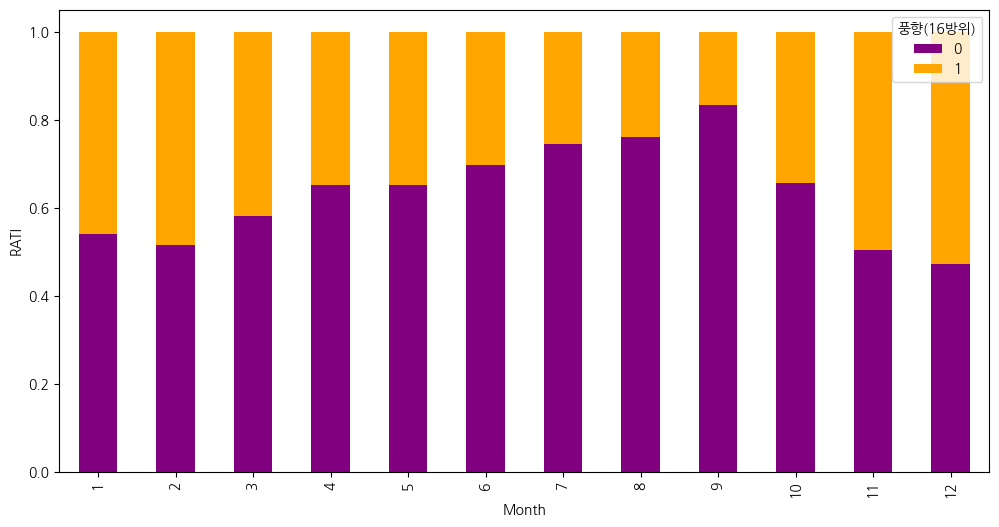

In [712]:
gpdiv(SEOUL)

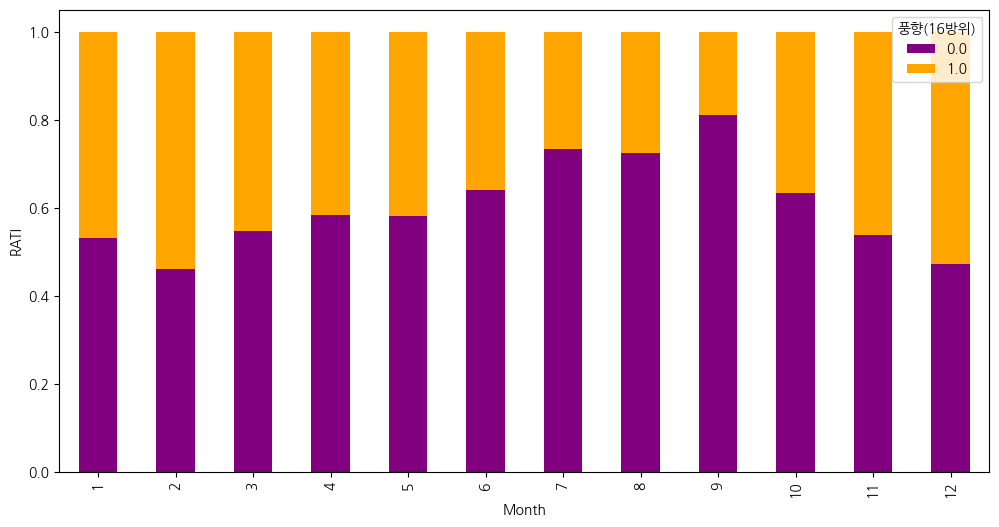

In [713]:
gpdiv(SUWON)

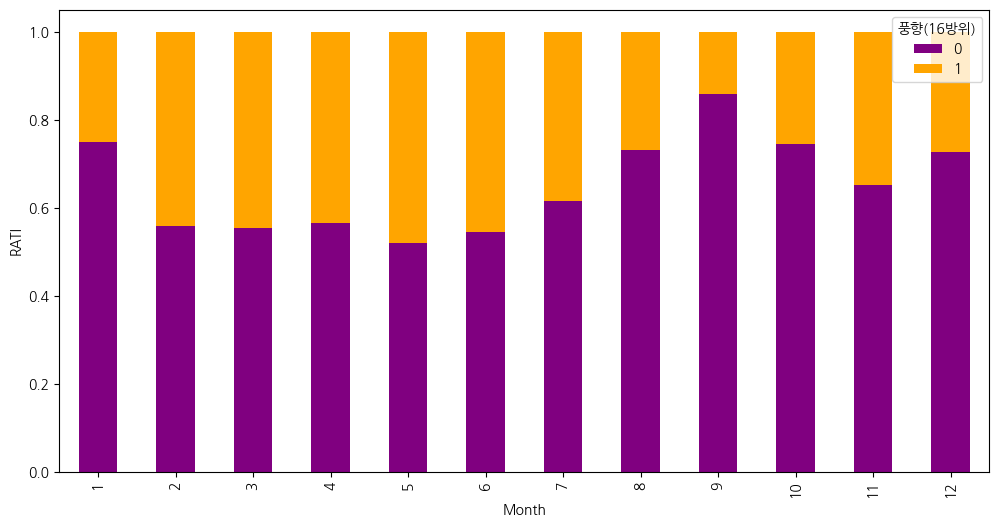

In [714]:
gpdiv(INCHU)

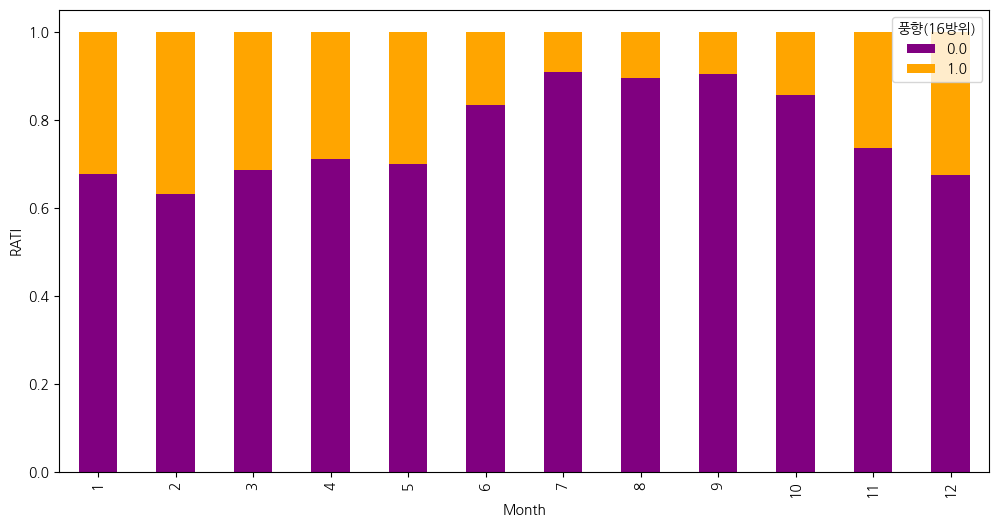

In [715]:
gpdiv(CHUAN)

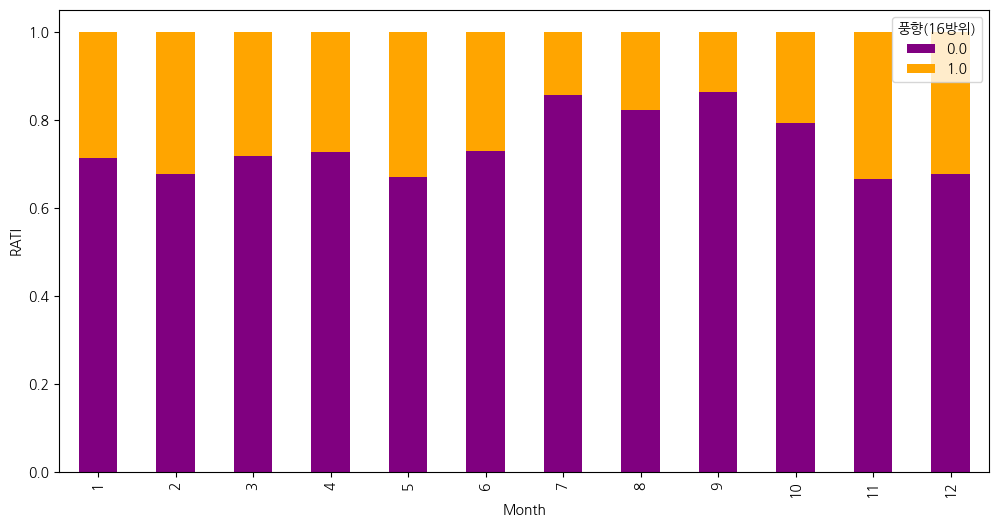

In [716]:
gpdiv(SEJON)

In [323]:
print(5/16)

0.3125


In [ ]:
영향이 있을거라 설정한 방위가 16개중 5가지이기에 월별 서풍 비율이 31%를 넘는다면
영향이 있다고 판단할만한 달이다

In [ ]:
또한 우리나라 중에서도 미세먼지가 특히 높았던 5지역을 합쳐서 수치가 낮았다면
더욱 신뢰할만할것

In [324]:
def formonth(w):
        a = '풍향(16방위)'
        w['mon'] = w['일시'].dt.month
        b = w.groupby('mon')[a].mean()
        c = b.apply(lambda x: 1 if x > 0.3125 else 0)
        return c

In [325]:
monseoul = formonth(SEOUL)
monsejon = formonth(SEJON)
monsuwon = formonth(SUWON)
moninchu = formonth(INCHU)
monchuan = formonth(CHUAN)

In [326]:
totalmon = monseoul + monsejon + moninchu + monchuan + monsuwon

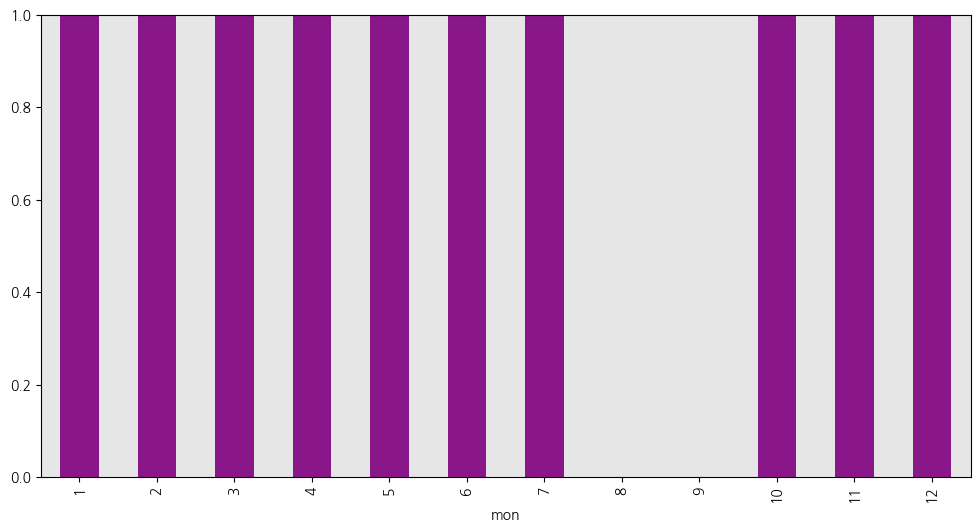

In [337]:
figure, ax = plt.subplots(figsize=(12,6))
totalmon.plot(kind = 'bar', color = 'purple',
             alpha = 0.9)
plt.ylim(0,1)
ax.set_facecolor('.9')

In [ ]:
8월과 9월이 영향이 없는 달이다
서풍이 안불기에 중국에서 미세먼지의 영향이 있을 수 없습니다.

In [ ]:
이때 기온과 미세먼지간의 상관성을 확인해보기로 하였습니다.
기준은 서울로 잡고 위의 미세먼지 관측 데이터와 비교하였습니다.

In [418]:
cowatwat = SEOUL['일시'].dt.day.corr(SEOUL['기온(°C)'])


In [419]:
cowatwat

0.013331341132912533

In [477]:
tem = pd.read_csv('기온.csv', encoding = 'euc-kr')


In [478]:
tem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      8760 non-null   int64  
 1   지점명     8760 non-null   object 
 2   일시      8760 non-null   object 
 3   기온(°C)  8760 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 273.9+ KB


In [479]:
tem['일시'] = pd.to_datetime(tem['일시'])


In [481]:
tem = tem[['일시', '기온(°C)']]

In [482]:
tem.head()

,일시,기온(°C)
0,2021-01-01 01:00:00,-8.7
1,2021-01-01 02:00:00,-9.1
2,2021-01-01 03:00:00,-9.3
3,2021-01-01 04:00:00,-9.3
4,2021-01-01 05:00:00,-9.7


In [483]:
montem = tem.groupby(df['일시'].dt.month)

In [484]:
montem = montem.mean(numeric_only = True)

In [485]:
montem = montem['기온(°C)'].reset_index().drop('일시', axis = 1)

In [486]:
montem

,기온(°C)
0,-2.386559
1,2.725744
2,8.974597
3,14.162917
4,17.037769
5,22.781111
6,28.079973
7,25.850538
8,22.561944
9,15.579301


In [488]:
pm10corr = pd.concat([ai102, montem], axis = 1)

In [491]:
pm10corr['기온(°C)'].corr(pm10corr['2021Y DM10'])

-0.5567645170598389

In [492]:
pm25corr = pd.concat([ai252, dddf], axis = 1)

In [494]:
pm25corr['기온(°C)'].corr(pm25corr['2021Y DM2.5'])

-0.7825471236259387

In [ ]:
비교해본 결과 10은 -55%의 음의 상관을, 2.5는 -78%의 음의 상관을 가진 것을 확인하였습니다.
즉, 기온이 낮으면 미세먼지 수치도 어느정도 높아지고,
높으면 미세먼지 수치도 어느정도 낮아질 것이란 점입니다.

<Axes: >

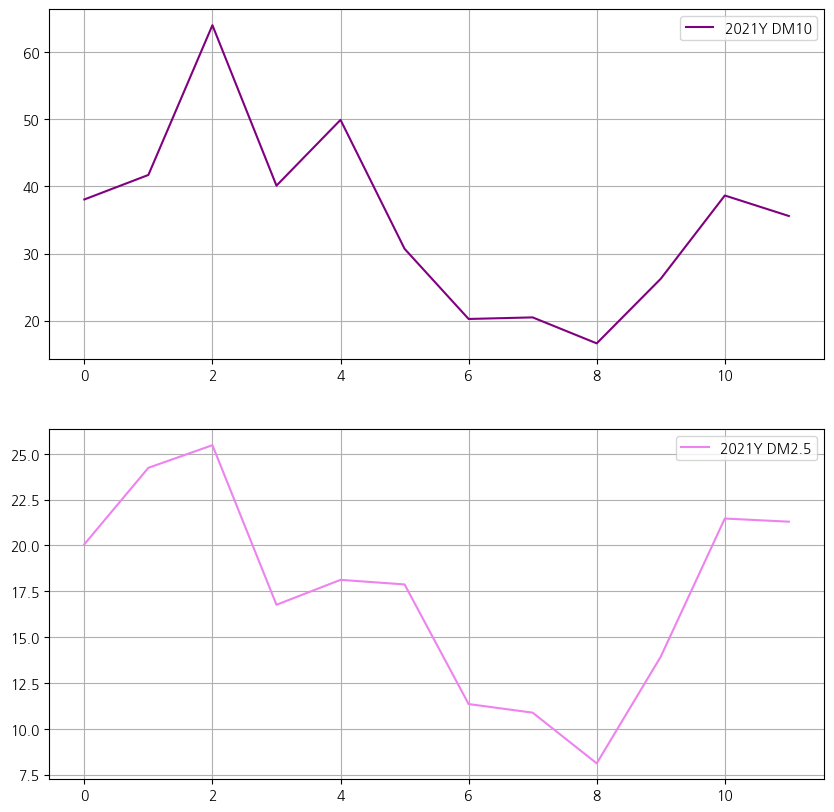

In [376]:
fig, axs = plt.subplots(figsize=(10,10), nrows = 2)
ai102.plot(ax = axs[0], kind = 'line', color = 'Purple', grid = True)
ai252.plot(ax = axs[1], kind = 'line', color = 'Violet', grid = True)

In [ ]:
PM10의 경우는 최대 60일때 8,9월이 20
PM2.5d의 경우는 최대 25일때 8,9월이 10정도로 나타났습니다.
즉, 8월과 9월은 서풍이 적어 미세먼지가 중국의 영향이 가장 적을때로
우리나라 자체적으로 만들어지는 미세먼지는 
PM10일때 33%, PM2.5일때 40%정도라는 계산이 나옵니다.

In [ ]:
이것이 고정된 수치가 아니라 비율로 계산하는 이유는
우선, 미세먼지는 전체적으로 기온과 반비례하는 상관성을 찾았는데,
8월과 9월은 상대적으로 기온이 20도로 높은 달에 속하므로
상대적으로 기온이 낮으며 미세먼지 수치가 높은 11~3월은 그에 따라
차등적으로 미세먼지 수치도 같이 올라갈 것이기 때문에
우리나라에서 생산되는 미세먼지 수치를 중국과 비교하여 비율로 나타낼수 있었습니다.

In [650]:
jejo = pd.read_csv('제조업_생산능력_및_가동률지수_2021.csv', encoding = 'euc-kr')

In [ ]:
우리나라의 미세먼지 배출원중 하나일 제조업과의 관련성도 확인해보았습니다.

In [651]:
jejo.head()

,지수,생산능력지수,생산능력지수.1,생산능력지수.2,생산능력지수.3,생산능력지수.4,생산능력지수.5,생산능력지수.6,생산능력지수.7,생산능력지수.8,...,가동률지수(계절조정).2,가동률지수(계절조정).3,가동률지수(계절조정).4,가동률지수(계절조정).5,가동률지수(계절조정).6,가동률지수(계절조정).7,가동률지수(계절조정).8,가동률지수(계절조정).9,가동률지수(계절조정).10,가동률지수(계절조정).11
0,산업별,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.1,2021.11,2021.12
1,제조업,102.80,102.20,102.20,101.90,101.70,101.90,101.60,101.80,101.90,...,105.20,102.90,102.90,103.20,104.40,105.60,104.50,105.0,106.90,111.70
2,식료품 제조업,99.90,99.30,98.80,99.10,99.00,98.90,98.00,98.00,97.80,...,100.50,99.80,100.20,99.80,101.00,101.20,102.80,103.7,105.70,109.40
3,음료 제조업,101.20,101.20,101.30,101.90,101.70,101.90,101.30,100.60,100.60,...,99.50,98.90,95.50,93.30,92.00,98.60,98.10,101.2,103.50,111.60
4,담배 제조업,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.50,97.90,90.30,78.20,90.20,84.50,95.9,97.50,92.50


In [652]:
jejo = jejo.set_index('지수').transpose()

In [653]:
jejo.head()

지수,산업별,제조업,식료품 제조업,음료 제조업,담배 제조업,섬유제품 제조업; 의복 제외,"가죽, 가방 및 신발 제조업",목재 및 나무제품 제조업; 가구 제외,"펄프, 종이 및 종이제품 제조업","코크스, 연탄 및 석유정제품 제조업",...,1차 금속 제조업,금속 가공제품 제조업; 기계 및 가구 제외,"전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업","의료, 정밀, 광학 기기 및 시계 제조업",전기장비 제조업,기타 기계 및 장비 제조업,자동차 및 트레일러 제조업,기타 운송장비 제조업,가구 제조업,기타 제품 제조업
생산능력지수,2021.01,102.8,99.9,101.2,100.0,99.8,96.5,99.8,99.1,101.3,...,99.4,96.6,110.4,98.9,101.1,102.0,101.8,99.2,97.8,101.3
생산능력지수.1,2021.02,102.2,99.3,101.2,100.0,97.5,93.8,99.9,99.3,101.3,...,99.3,96.1,109.9,99.9,100.0,101.8,101.6,97.0,97.7,101.8
생산능력지수.2,2021.03,102.2,98.8,101.3,100.0,96.4,96.6,97.4,97.4,102.0,...,99.3,95.4,109.6,99.2,99.5,102.0,103.5,96.6,97.6,101.2
생산능력지수.3,2021.04,101.9,99.1,101.9,100.0,95.4,98.1,92.2,95.5,102.0,...,99.3,92.8,110.0,100.1,99.0,101.6,103.7,96.7,95.1,101.5
생산능력지수.4,2021.05,101.7,99.0,101.7,100.0,95.4,97.3,91.0,95.6,102.0,...,99.4,90.9,109.9,101.1,98.6,101.5,103.7,96.6,94.5,101.5


In [654]:
jejo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 생산능력지수 to 가동률지수(계절조정).11
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   산업별                            36 non-null     float64
 1   제조업                            36 non-null     float64
 2   식료품 제조업                        36 non-null     float64
 3   음료 제조업                         36 non-null     float64
 4   담배 제조업                         36 non-null     float64
 5   섬유제품 제조업; 의복 제외                36 non-null     float64
 6   가죽, 가방 및 신발 제조업                36 non-null     float64
 7   목재 및 나무제품 제조업; 가구 제외           36 non-null     float64
 8   펄프, 종이 및 종이제품 제조업              36 non-null     float64
 9   코크스, 연탄 및 석유정제품 제조업            36 non-null     float64
 10  화학 물질 및 화학제품 제조업; 의약품 제외       36 non-null     float64
 11  고무 및 플라스틱제품 제조업                36 non-null     float64
 12  비금속 광물제품 제조업                   36 non-nu

In [655]:
jejo['합산'] = jejo.mean(axis=1)

In [656]:
jejo = jejo.groupby('산업별').mean()


In [657]:
jejo.head()

지수,제조업,식료품 제조업,음료 제조업,담배 제조업,섬유제품 제조업; 의복 제외,"가죽, 가방 및 신발 제조업",목재 및 나무제품 제조업; 가구 제외,"펄프, 종이 및 종이제품 제조업","코크스, 연탄 및 석유정제품 제조업",화학 물질 및 화학제품 제조업; 의약품 제외,...,금속 가공제품 제조업; 기계 및 가구 제외,"전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업","의료, 정밀, 광학 기기 및 시계 제조업",전기장비 제조업,기타 기계 및 장비 제조업,자동차 및 트레일러 제조업,기타 운송장비 제조업,가구 제조업,기타 제품 제조업,합산
산업별,,,,,,,,,,,,,,,,,,,,,
2021.01,101.766667,100.466667,93.666667,96.400000,99.866667,95.866667,99.466667,101.666667,99.466667,104.400000,...,100.500000,101.366667,101.933333,102.466667,100.566667,106.433333,98.266667,107.200000,93.066667,183.870000
2021.02,100.833333,96.900000,95.300000,94.366667,96.100000,93.100000,99.433333,100.733333,98.833333,107.366667,...,98.433333,101.933333,101.000000,99.933333,100.866667,102.133333,91.800000,103.766667,92.166667,182.471884
2021.03,105.666667,100.633333,100.800000,102.233333,105.400000,93.200000,106.700000,105.100000,99.266667,109.100000,...,103.866667,105.800000,111.666667,106.500000,106.466667,109.033333,96.600000,107.433333,102.500000,187.638986
2021.04,103.033333,100.033333,100.766667,101.500000,103.700000,101.366667,104.133333,103.466667,101.533333,104.600000,...,104.300000,99.633333,109.333333,104.400000,106.800000,106.633333,95.300000,106.166667,101.600000,186.684348
2021.05,102.500000,99.300000,98.466667,97.333333,101.166667,98.000000,103.633333,101.933333,103.433333,104.100000,...,103.100000,103.266667,110.433333,103.600000,104.766667,98.933333,95.066667,100.600000,103.500000,185.319565


In [ ]:
이렇게 21년도 달별로 제조업 생산능력, 가동률을 만들었습니다.

In [658]:
jejo = jejo.reset_index()

In [659]:
jejoto = pd.concat([jejo, ai102],axis = 1)

In [660]:
jejoto.head()

,산업별,제조업,식료품 제조업,음료 제조업,담배 제조업,섬유제품 제조업; 의복 제외,"가죽, 가방 및 신발 제조업",목재 및 나무제품 제조업; 가구 제외,"펄프, 종이 및 종이제품 제조업","코크스, 연탄 및 석유정제품 제조업",...,"전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업","의료, 정밀, 광학 기기 및 시계 제조업",전기장비 제조업,기타 기계 및 장비 제조업,자동차 및 트레일러 제조업,기타 운송장비 제조업,가구 제조업,기타 제품 제조업,합산,2021Y DM10
0,2021.01,101.766667,100.466667,93.666667,96.400000,99.866667,95.866667,99.466667,101.666667,99.466667,...,101.366667,101.933333,102.466667,100.566667,106.433333,98.266667,107.200000,93.066667,183.870000,38.06250
1,2021.02,100.833333,96.900000,95.300000,94.366667,96.100000,93.100000,99.433333,100.733333,98.833333,...,101.933333,101.000000,99.933333,100.866667,102.133333,91.800000,103.766667,92.166667,182.471884,41.71875
2,2021.03,105.666667,100.633333,100.800000,102.233333,105.400000,93.200000,106.700000,105.100000,99.266667,...,105.800000,111.666667,106.500000,106.466667,109.033333,96.600000,107.433333,102.500000,187.638986,64.06250
3,2021.04,103.033333,100.033333,100.766667,101.500000,103.700000,101.366667,104.133333,103.466667,101.533333,...,99.633333,109.333333,104.400000,106.800000,106.633333,95.300000,106.166667,101.600000,186.684348,40.12500
4,2021.05,102.500000,99.300000,98.466667,97.333333,101.166667,98.000000,103.633333,101.933333,103.433333,...,103.266667,110.433333,103.600000,104.766667,98.933333,95.066667,100.600000,103.500000,185.319565,49.93750


In [661]:
jejoto = jejoto[['합산', '2021Y DM10']]

In [671]:
jejoto2 = pd.concat([jejo, ai252],axis = 1)

In [672]:
jejoto2.head()

,산업별,제조업,식료품 제조업,음료 제조업,담배 제조업,섬유제품 제조업; 의복 제외,"가죽, 가방 및 신발 제조업",목재 및 나무제품 제조업; 가구 제외,"펄프, 종이 및 종이제품 제조업","코크스, 연탄 및 석유정제품 제조업",...,"전자 부품, 컴퓨터, 영상, 음향 및 통신장비 제조업","의료, 정밀, 광학 기기 및 시계 제조업",전기장비 제조업,기타 기계 및 장비 제조업,자동차 및 트레일러 제조업,기타 운송장비 제조업,가구 제조업,기타 제품 제조업,합산,2021Y DM2.5
0,2021.01,101.766667,100.466667,93.666667,96.400000,99.866667,95.866667,99.466667,101.666667,99.466667,...,101.366667,101.933333,102.466667,100.566667,106.433333,98.266667,107.200000,93.066667,183.870000,20.062500
1,2021.02,100.833333,96.900000,95.300000,94.366667,96.100000,93.100000,99.433333,100.733333,98.833333,...,101.933333,101.000000,99.933333,100.866667,102.133333,91.800000,103.766667,92.166667,182.471884,24.234375
2,2021.03,105.666667,100.633333,100.800000,102.233333,105.400000,93.200000,106.700000,105.100000,99.266667,...,105.800000,111.666667,106.500000,106.466667,109.033333,96.600000,107.433333,102.500000,187.638986,25.468750
3,2021.04,103.033333,100.033333,100.766667,101.500000,103.700000,101.366667,104.133333,103.466667,101.533333,...,99.633333,109.333333,104.400000,106.800000,106.633333,95.300000,106.166667,101.600000,186.684348,16.765625
4,2021.05,102.500000,99.300000,98.466667,97.333333,101.166667,98.000000,103.633333,101.933333,103.433333,...,103.266667,110.433333,103.600000,104.766667,98.933333,95.066667,100.600000,103.500000,185.319565,18.125000


In [673]:
jejoto2 = jejoto2[['합산', '2021Y DM2.5']]

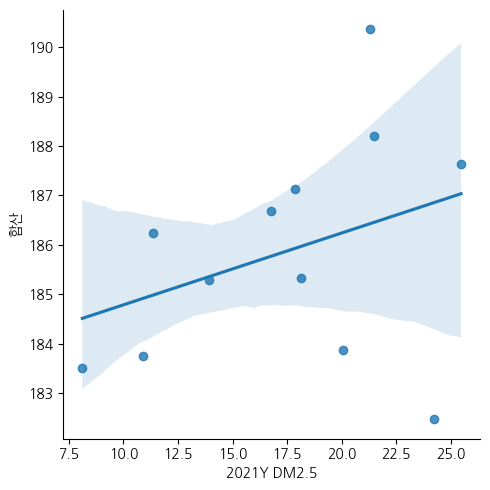

In [684]:
sns.lmplot(data = jejoto2, y = '합산', x = '2021Y DM2.5',)

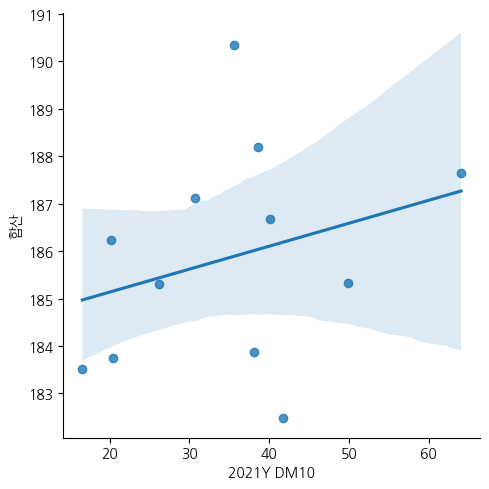

In [685]:
sns.lmplot(data = jejoto, y = '합산', x = '2021Y DM10',)

In [ ]:
회귀분석을 진행해본 결과 약간이지만 선형성이 있다는 사실이 나왔습니다.

In [686]:
def lmline(w):
    a = w.iloc[:,1].values
    b = w.iloc[:,0].values
    aa = np.mean(a)
    bb = np.mean(b)
    c = np.sum((a - aa) * (b - bb))
    d = np.sum((a - aa) ** 2)
    e = c / d
    return e

    

In [687]:
lmline(jejoto)

0.048405737833243936

In [688]:
lmline(jejoto2)

0.14532495585730426

In [ ]:
회귀식의 기울기를 계산하여본 결과 PM10은 0.05, PM2.5는 0.15이라는 결과가 나왔는데
이는 어쨌든 두 변수인 미세먼지 양과 제조업 합산간에 양의 상관관계가 있다는 뜻입니다.
다만 비율이 의외로 낮은 편에 속한다는 사실인데,
중국이 영향이 적었던 8월과 9월의 분포가 각

In [694]:
jejo.iloc[8:10]['합산']

8    183.518406
9    185.297101
Name: 합산, dtype: float64

In [696]:
ai102.iloc[8:10], ai252.iloc[8:10]

(   2021Y DM10
 8   16.593750
 9   26.234375,
    2021Y DM2.5
 8     8.117188
 9    13.937500)

In [ ]:
이렇게 제조업은 183~185 약1.8 = 2의 차이를
PM10은 16~26 9.7 = 10의 차이를
PM2.5는 8~13 5.8 = 6의 차이를 보여주고 있습니다.
2만큼 증가했을때 PM10은 0.1, PM2.5는 0.3이 증가했으니

In [ ]:
제조업은 우리나라 내부에서 전체미세먼지(PM10)의 10%를 차지하고
전체초미세먼지(PM2.5)의 5%를 차지한다는 점을 확인할 수 있었습니다.

In [ ]:
결론: 한국은 11월 ~ 3월에 미세먼지 수치가 가장 높으며,
기온과 미세먼치 수치 사이에는 어느정도 강한 음의 상관관계가 존재합니다.
또한 전체적으로 서풍 비율이 적어 중국의 영향을 받지 않는 달은 주로 8월과 9월이었고
이를통해 국내 자체의 미세먼지 양을 확인하여 미세먼지 수치가 가장 높을때 국내의 영향을 확인해본 결과
미세먼지는 전체의 33%, 초미세먼지는 전체의 40%를 차지한다고 결론을 내렸습니다.
비록 완전한 음의 상관관계가 아니라서 실제 비율은 이것보다 적긴 하지만,
의외로 국내 자체에서 생산되는 양 생각보다 많이 생산된다는 뜻이기도 합니다.
추가적으로 미세먼지 관련성이 높다고 생각한 제조업의 경우 우리나라 자체 생산 미세먼지의
10%, 5%를 각각 차지하여 의외로 적은 모습을 보여줬습니다.

In [ ]:
아쉬운점:우리나라 중에서도 미세먼지가 높았던 지역 5개를 선정하여 진행했는데,
과제를 진행하면서 실제로 학교 지역과 가까운 수원과 같이 자잘한 도움도 되긴 했지만,
지역별 길이가 같아진 상황에서 합쳐서 진행했으면 보다 깔끔하게 진행됬을 것 같아 아쉽다.
또한, 미세먼지 발생 비율이 높을 것이라 예상한 제조업의 비율이 생각보다 낮아 아쉬웠다.
그외 예상될만한 발생원인은 아마 자동차 운송 정도라고 생각은 되지만 감이 안잡히는게 좀 아쉬웠다.

In [ ]:
사용한 데이터세트

kosis 미세먼지(PM10)월별 도시별 대기오염도 / 2019, 2020, 2021, 2022년 1월 ~ 12월 데이터
kosis 미세먼지(PM2.5)월별 도시별 대기 오염도 / 2019, 2020, 2021, 2022년 1월 ~ 12월 데이터
에어코리아 최종확정 측정자료 2021년자 / 1월 ~ 12월 전체 데이터
기상청 기상 자료개방 포털 2021 1월 ~ 2021년 12월 / 수원, 서울, 세종, 강화, 천안 풍향 데이터
기상청 기상 자료개방 포털 2021 1월 ~ 2021년 12월 / 서울 기온 데이터
kosis 제조업 생산능력및 가동률 지수 / 2021년 1월 ~ 2021년 12월 데이터